<a href="https://colab.research.google.com/github/mugalan/lessons/blob/main/vibration/class-notes/Note_Book_Dynamic_Systems_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook prepared by D. H. S. Maithripala of the Dept. of Mechanical Engineering, of the University of Peradniya as a learning resource for the 'Analysis of Vibratory Systems' part of the course ME320 Dynamics of Rigid Body Systems and ME327 Vibrations. Please email smaithri at eng.pdn.ac.lk of any mistakes, errata and or suggestions for improvements

# Setting Up

## Importing Python Packages

In [ ]:
import numpy as np
from numpy import linalg
import scipy as sp
import math
from scipy.integrate import odeint
#from matplotlib import animation, rc
from IPython.display import HTML

import plotly.graph_objects as go
from sympy import *

### Python Vibratory Systems Class Definition

In [ ]:
class mugas_vibration_functions:
  
    def __init__(self): 
        self=[];

    def dynamicSystemModel(self, X, t, A, B, cParameters):
        dXdt=A @ X + B * self.controlFn(t, cParameters);
        self.X=X;
        return dXdt

    def controlFn(self, t, cParameters):
        return cParameters[0]*np.cos(cParameters[1] * t)

    def simulateDySystem(self, Tmax, dT, X0, A,B, cParameters, xLabel, yLabel):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))
        sol = odeint(self.dynamicSystemModel, X0, t, args=(A, B, cParameters));
        self.soln=sol;
        fig = go.Figure()
        [nt,nS]=sol.shape;

        # Add traces
        for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
            fig.update_layout(xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
        
        fig.show()
        return [t,sol,fig] 
    
    def animate_particle_motion(self, XX, axisRange, figTitle):
        xx=[jj[0] for jj in XX]
        yy=[jj[1] for jj in XX]
        zz=[jj[2] for jj in XX]

        fig = go.Figure(
            data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                            mode="markers",
                            marker=dict(color="red", size=10)),
                go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                            mode="lines",
                            line=dict(color="blue", width=2))],
            layout=go.Layout(
                scene = dict(
                            xaxis=dict(range=axisRange[0], autorange=False),
                            yaxis=dict(range=axisRange[1], autorange=False),
                            zaxis=dict(range=axisRange[2], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text=figTitle, hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[p[0]],
                    y=[p[1]],
                    z=[p[2]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="red", size=10))])

                for p in XX]
        )

        fig.show()
        return fig

    def animate_2D_scatter_plot(self, x, YY, xlabel, ylabel, title):
        fig = go.Figure(data=[go.Scatter(x=x,y=YY[0,:])],
                layout=go.Layout(
                    xaxis={'title':xlabel},
                    yaxis={'title':ylabel,'range':[1.1*YY.min(),1.1*YY.max()]},
                    title={'text':title,'y':0.9,'x':0.5, 'xanchor': 'center','yanchor': 'top'},
                    scene = dict(aspectratio=dict(x=1, y=1)),    
                    hovermode="closest",
                    updatemenus=[dict(type="buttons",
                                    buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None])])]
                    ),
            frames=[go.Frame(data=[go.Scatter(x=x,y=y)]) for y in YY]
        )

        #fig.show()
        return fig

In [ ]:
mv=mugas_vibration_functions()

# Section#1: First Approximation of Simple Vibratory System


Consider the blower shown in figure below and answer the following:

1. Explain the source of vibration arising in the blower using schematics and mathematical justification and state the relationship between the vibrational frequency of the blower and the rotational speed of the blower. 

2. We are interested in predicting its small amplitudte motion under various conditions. Show that for small amplitude motion the system response is approximated by the solutions of the linear second order ODE of the form

\begin{align}
M\ddot{x}+C\dot{x}+Kx=F(t)
\end{align}

3. What can you say about the response of the system to a sudden initial vertical displacement that may have been caused by some accidental event.

4. What can you say about the amplitude of vibrations for 

* extremely high rotational speeds of the blower? Justify your answer clearly.

* extremely low rotational speeds of the blower? Justify your answer clearly.

5. Plot the amplitude of vibration of the blower versus the rotational speed of the blower?

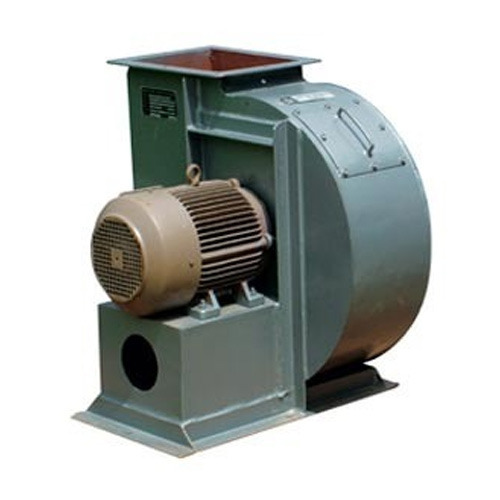



## A1-The cause of vibration in the system

Consider the figure shown below that can be consdered as a first approximation of the system for small amplitude motion:

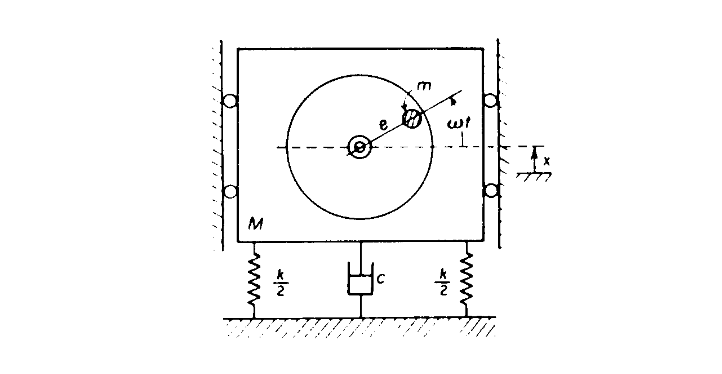

Due to the eccentricity $e$ of the center of mass of the rotating object a centrifugal force $me\omega^2$ acts on the center. We see that the vertical and horizontal components of this force are respectively given by:
\begin{align}
F_v&=me\omega^2\,\sin{\omega t},\\
F_h&=me\omega^2\,\cos{\omega t}
\end{align}

All rotating objects have an eccentric center of mass due to practical difficulties of achieving perfect precision. Thus all bodies with rotating objects will inevitably experince sinusoidal forces with frequency equal to the frequancy of rotation of the object.

## A2-Predicitng the motion of the system: Mathematical Modelling 

Measuring the displacement of the center of mass of the rotor from its equilibrium position and using the Newtons equations we find that

\begin{align}
M\ddot{x}+C\dot{x}+Kx=F(t)
\end{align}

Being a linear second order ODE one can solve it explicitly. Since this differential equation was derived by considering small deflections and velocities of the mass it is interesting to find out if the solutions of the differential equation correspond to the physical behaviour of the SMD system for small deflections.One way of finding the solutions of this differential equation is the Laplace  transform method that we use below.

Let $\omega^2_n=\frac{K}{M}$ and $2 \zeta \omega_n=\frac{C}{M}$. Then the above equations take the form
\begin{align}
\ddot{x}(t) + 2 \zeta \omega_n \dot{x}(t) + \omega^2_n x(t)= \frac{1}{M}F(t).
\end{align}

The parameter $\omega_n$ is called the \textit{undamped natural frequency} of the system and $\zeta$ is called the \textit{damping ratio} of the system. The reason for this nomenclature will be apparent when we investigate the solutions of this differential equation.




For a given $f(t)$ that does not grow faster than an exponential function it can be shown, owing to the linearity of the system, that the solution will also not grow
faster than an exponential function. Thus taking Laplace transform
of both sides of and using the linearity property of the Laplace transform we have
\begin{align}
\mathcal{L}\left\{\ddot{x}(t) + 2 \zeta \omega_n \dot{x}(t) + \omega^2_n x(t)\right\}&=\frac{1}{M}\mathcal{L}\left\{f(t)\right\},\\
(s^2+2 \zeta \omega_n s + \omega_n^2) X(s) - \dot{x}(0)- ( s + 2\zeta \omega_n)x(0)  &= \frac{1}{M} F(s).
\end{align}
This yields
\begin{align}
X(s)=\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \dot{x}(0)+\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}x(0)
+\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s).
\end{align}
Since the Laplace is a one-to-one and onto operator its inverse exists and thus the the solution can be uniquely determined to be $x(t)=\mathcal{L}^{-1}\{X(s)\}$. Using the linearity property of the inverse we thus have


\begin{align}
x(t)&=\dot{x}(0)\mathcal{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+x(0)\mathcal{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}+\mathcal{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}.
\end{align}


Observe that the first two terms depend on the initial conditions and do not depend on the forcing while the last term does depend on the forcing but is in depend of the initial conditions. Therefore 
we may breakup the solution into two parts such that $x(t)=x_{IC}(t)+x_f(t)$ where
\begin{align}
x_{IC}(t)&=\dot{x}(0)\mathcal{L}^{-1}\left\{\frac{1}{s^2+2 \zeta \omega_n s + \omega_n^2} \right\}+x(0)\mathcal{L}^{-1}\left\{\frac{ s + 2\zeta \omega_n}{s^2+2 \zeta \omega_n s + \omega_n^2}\right\}, \\
x_f(t)&=\mathcal{L}^{-1}\left\{\frac{1/M}{s^2+2 \zeta \omega_n s + \omega_n^2}F(s)\right\}.
\end{align}
We will call the first part two parts given by $x_{IC}(t)$ that depends only on the initial conditions the \textit{initial condition response} while we will call the last part that depends only on the forcing the \textit{forced response}.

The inverse Laplace transforms of each of the terms are obtained by expanding the terms in a partial fraction expansion. This depends on the roots of the polynomial
\begin{align}
\Delta(s)&=s^2+2 \zeta \omega_n s + \omega_n^2.
\end{align}
The two roots , $-\lambda_1$ and $-\lambda_2$, of the polynomial are given by
\begin{align}
-\lambda_1&=\omega_n (-\zeta+\sqrt{\zeta^2-1}),\\
-\lambda_2&=\omega_n (-\zeta-\sqrt{\zeta^2-1}).
\end{align}
Since the character of the solution is determined by the roots of the above polynomial it is referred to as the \textit{characteristic polynomial} of the system. These roots will be complex and conjugate, real and distinct, or real and repeated depending on if $0\leq \zeta <1$, $\zeta >1$, or $\zeta=1$ respectively.

Let us consider the case $0\leq \zeta <1$. In this case the roots of the characteristic polynomial $\Delta(s)=s^2+2 \zeta \omega_n s + \omega_n^2$ of the system
are given by $-\lambda_1=-\zeta\omega_n+i\omega_d$ and $-\lambda_2=-\zeta\omega_n-i\omega_d$. 
A typical location of the roots of the characteristic polynomial in this case is shown in the figure below

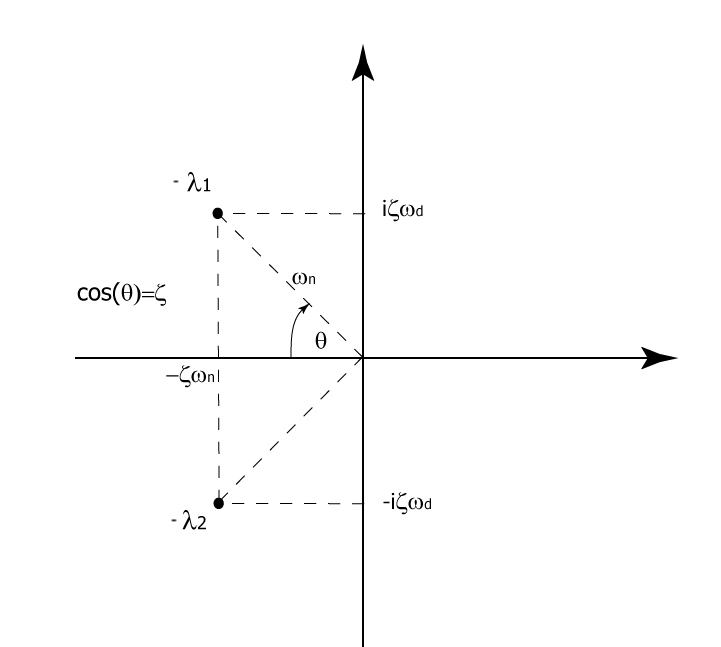

Find the roots of $\Delta (s)$ for various values of natural frequencies and natural frequancies

In [ ]:
wn=1; zeta=0.1;
Delta_s=[1, 2*zeta*wn, wn**2];
np.roots(Delta_s)

## A3-Initial Condition Response




Assume that the forcing is such that  
\begin{align}
\mathcal{L}\{f(t)\}=F(s)=\frac{N(s)}{(s+\beta_1)(s+\beta_2)\cdots(s+\beta_k)}.
\end{align}
When $0\leq\zeta \leq 1$ it is a straight forward exercise in partial fraction expansion to show that the above expressions reduce to

\begin{align}
x_{IC} (t) &=e^{-\zeta \omega_nt}\left(\frac{\dot{x}(0)}{\omega_d}\cos{(\omega_dt-\pi/2)}+\frac{x(0)}{\sqrt{1-\zeta^2}}\sin{(\omega_dt+\phi_{IC})}\right),\\
x_{f} (t) &=\left(|\alpha|\,e^{-\zeta \omega_n t}\cos{(\omega_dt+\phi)}+\left(r_1 e^{-\beta_1 t}+\cdots+r_k e^{-\beta_k t}\right)\right)\;,
\end{align}
where $\omega_d=\omega_n\sqrt{1-\zeta^2}$, $\phi_{IC}=\arcsin\left({\sqrt{1-\zeta^2}}\right)$, and the constants $\alpha$ and $r_i$ are determined by,

\begin{align}
\alpha&=(s+\lambda_i)G(s)F(s)\left|_{s=-\lambda_i}\right.,\\
r_i&=(s+\beta_i)G(s)F(s)\left|_{s=-\beta_i}\right..
\end{align}

Below we will plot $x_{IC} (t)$ for various different system parameter conditions.

In [ ]:
wd=wn*np.sqrt(1-zeta**2); phi_IC=np.arcsin(1-zeta**2); x0=1; xdot0=0;
t=np.linspace(0,100,1000);
x_IC=np.exp(-zeta*wn*t)*((xdot0/wd)*np.cos(wd*t-np.pi/2)+(x0/(np.sqrt(1-zeta**2)))*np.sin(wd*t+phi_IC))   #np.exp(-zeta*wn*t);

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=x_IC, mode='lines+markers', name='x'))
fig.update_layout(title='Initial Condition Response', xaxis=dict(title='Time / t'), yaxis=dict(title=r'$x_{IC}(t)$'))
fig.show()

## A4-Forced Response

In the case of forced vibrations it suffices to look at only the forced response $x_f(t)$ since the initial condition part of the response dies out when damping is positive.

Let us now take a look at the forced part of the response a bit more closely.
\begin{align}
x_{f} (t) &=\left(|\alpha|\,e^{-\zeta \omega_n t}\cos{(\omega_dt+\phi)}+\left(r_1 e^{-\beta_1 t}+\cdots+r_k e^{-\beta_k t}\right)\right)\;,
\end{align}
where 
\begin{align}
\alpha&=(s+\lambda_i)G(s)F(s)\left|_{s=-\lambda_i}\right.,\\
r_i&=(s+\beta_i)G(s)F(s)\left|_{s=-\beta_i}\right..
\end{align}

It can be seen that the forced response can be broken up into two parts:
\begin{align}
x_f(t)=x_{tr}(t)+x_{ss}(t),
\end{align}
where
\begin{align}
x_{tr} (t) &=\left(|\alpha|\,e^{-\zeta \omega_n t}\cos{(\omega_dt+\phi)}\right) 1(t),\\
x_{ss} (t) &=\left(r_1 e^{-\beta_1 t}+\cdots+r_k e^{-\beta_k t}\right)\;1(t).
\end{align}
Once again we see that for positive damping the transient part of the response $x_{tr}(t)$ asymptotically tends to zero as $t$ tends to infinity and hence 
it suffices to only look at the steady state part of the forced response. 

Let us consider a very particular type of forcing that always arises in the presence of roatary parts in a system.
\begin{align}
F(t)=F_0\,\cos{(\omega t)}.
\end{align}
Since the Laplace transform of $F(t)$ is 

\begin{align}
F(s)=F_0\left(\frac{s}{s^2+\omega^2}\right)=F_0\left(\frac{s}{(s+i\omega)(s-i\omega)}\right).
\end{align}

Thus it can be shown that the steady state response of the system for sinusoidal forcing is
\begin{align}
x_{ss}(t)=\chi(\omega)\,F_0\,\cos(\omega t +\phi(\omega))\:1(t),
\end{align}
where
\begin{align}
\chi(\omega)=\frac{1/M}{\sqrt{(\omega_n^2-\omega^2)^2+4\zeta^2\omega^2\omega_n^2}}
\end{align}
and
\begin{align}
\phi(\omega)=\arctan{\left(\frac{2\zeta\omega\omega_n}{\omega_n^2-\omega^2}\right)}.
\end{align}
Thus we see that the steady state response to sinusoidal forcing is also sinusoidal with frequency of oscillation equal to that of the forcing frequency $\omega$. However it differs from the forcing in two distinct ways. One is that the amplitude of the steady state solution is $\chi(\omega)$ times the magnitude of the forcing while the other is that the phase of the steady state solution is shifted by $\phi(\omega)$ from the phase of the forcing. It is also important to note that the amplitude magnification and the phase shift depend on the forcing frequency $\omega$. We will see that this observation has crucial implications for vibration analysis and control system design.

One can show that $\chi(\omega)$ is maximum when 
\begin{align}
\omega=\omega_r=\omega_n\sqrt{1-2\zeta^2},
\end{align}
and that the maximum amplitude of vibration is given by
\begin{align}
{x_{ss}}_{max}=\frac{F_0/M}{2\zeta\omega_n^2\sqrt{1-\zeta^2}}.
\end{align}

Amplitude magnification Vs rotational frequancy

In [ ]:
M=1; wn=1; zeta=0.1; 
w=np.logspace(-1,1,1000);
chi_w=abs((1/M)/(np.sqrt((wn**2-w**2)**2+4*zeta**2*w**2*wn**2)))
phi_w=np.arctan(2*zeta*w*wn/(wn**2-w**2))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=chi_w, mode='lines+markers', name='x'))
fig.update_layout(title='Amplitude Magnification', yaxis=dict(title=r'$\chi(\omega)$'), xaxis=dict(title=r'$\log{\omega}$', type='log'))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=phi_w, mode='lines+markers', name='x'))
fig.update_layout(title='Phase Shift', yaxis=dict(title=r'$\phi(\omega)$'), xaxis=dict(title=r'$\log{\omega}$', type='log'))
fig.show()

# Section#2: Example of a 2-DOF Coupled Spring Mass Damper System

## A1-Lumped Parameter Model of 2-DOF Spring Mass Damper System

In this section we will begin to develop the tools necessary to analyze the vibratory motion of coupled systems such as multi-story buildings, rotary machines mounted on elastic foundations, and multi-rotor shafts. Specifically to keep things simple we will address in detail a system that can be approximated as a 2-DOF coupled spring mass damper system with external forcing.  

We first consider the vibration of a coupled spring mass damper system that can be approximated by a system of the form: 

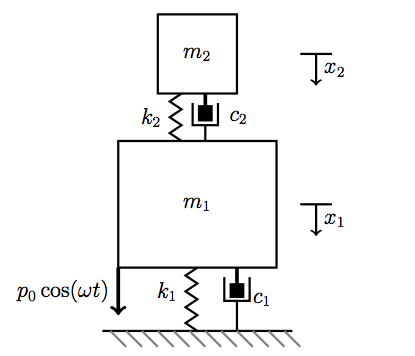



Choosing the equilibrium positions of the masses as the reference points and applying Newton's laws we obtain
\begin{align}
m_1\ddot{x}_1+(c_1+c_2)\dot{x}_1+(k_1+k_2)x_1 -c_2\dot{x}_2-k_2x_2 &=&f(t),\\
m_2\ddot{x}_2+c_2\dot{x}_2+k_2x_2-c_2\dot{x}_1-k_2x_1 &=&0,
\end{align}
where we have set $f(t)=p_0\cos{(\omega t)}$.
We can write the above equations as
\begin{align}
\begin{bmatrix} m_1 & 0\\0 & m_2\end{bmatrix}\begin{bmatrix} \ddot{x}_1 \\ \ddot{x}_2\end{bmatrix}+
\begin{bmatrix} (c_1+c_2) & -c_2\\-c_2 & c_2\end{bmatrix} \begin{bmatrix}\dot{x}_1 \\ \dot{x}_2\end{bmatrix}+
\begin{bmatrix} (k_1+k_2) & -k_2\\-k_2 & k_2\end{bmatrix}\begin{bmatrix} {x}_1 \\ {x}_2\end{bmatrix} =
\begin{bmatrix} f(t) \\ 0\end{bmatrix}
\end{align}

Let 
\begin{align}
X(t)=\begin{bmatrix}x_1(t)\\ x_2(t)\end{bmatrix},\:\:\:\:f(t)=\begin{bmatrix}f_1(t)\\ 0\end{bmatrix},\:\:\:\:
M=\begin{bmatrix} m_1 & 0\\0 & m_2\end{bmatrix} ,\:\:\:\: C=\begin{bmatrix} (c_1+c_2) & -c_2\\-c_2 & c_2\end{bmatrix} \:\:\:\:
K=\begin{bmatrix} (k_1+k_2) & -k_2\\-k_2 & k_2\end{bmatrix}.
\end{align}
Then we can write the above equations as
\begin{align}
M\ddot{X}+C\dot{X}+KX=F(t).
\end{align}

Notice the similarity with the 1-DOF spring mass damper system. We are interested in solving this $2^{nd}$ order matrix ODE in order to understand the vibratory behavior of the system. We do so in two steps. Recalling the crucial role the undamped natural frequency played in the resonance analysis of the 1-DOF spring mass damper system we first investigate undamped free vibrations of the system and then consider the damped forced vibration behavior of the system.


For completeness we also write down the dynamic system form of the model.
\begin{align}
\dot{X}= AX+B\,f(t),
\end{align}
where
\begin{align}
X(t)=\begin{bmatrix} x_1(t)\\ x_2(t) \\ \dot{x}_1(t)\\ \dot{x}_2 (t)\end{bmatrix},\:\:\:\:
B=\begin{bmatrix}0\\ 0\\ 1\\ 0\end{bmatrix},\:\:\:\:
A=\begin{bmatrix} 0 & 0 & 1& 0\\ 0 & 0 & 0 &1 \\ -(k_1+k_2) & k_2&-(c_1+c_2) & c_2\\ k_2 & -k_2 & c_2 & -c_2
\end{bmatrix}
\end{align}

### A1.1-Modal Analysis

In vibration analysis we are typically interested in near resonant conditions. That is, in cases where the system is very lightly damped and the forcing frequency is close to the resonance frequencies of the system. Since the behavior of the system depends smoothly on the damping ratios we see that the real behavior of the system will thus be described in a qualitative and approximately quantitative sense quite well by analyzing the case where the damping is zero. 

Thus in this section we will assume that the damping is negligible and hence that the system equations are approximately given by
\begin{align}
\ddot{X}+\Omega X=M^{-1}F(t),
\end{align}
where
\begin{align}
\Omega=M^{-1}K=
\begin{bmatrix}\omega_{n1}^2(1+\alpha \mu)& -\alpha\mu \omega_{n_1}^2\\ -\alpha\omega_{n1}^2 & \alpha\omega_{n1}^2\end{bmatrix}.
\end{align}
with
\begin{align}
\omega_{n1}^2=\frac{k_1}{m_1},\:\:\:\omega_{n2}^2=\frac{k_2}{m_2},\:\:\:2\zeta_1\omega_{n1}=\frac{c_1}{m_1},\:\:\:2\zeta_2\omega_{n2}=\frac{c_2}{m_2},
\:\:\:\mu=\frac{m_2}{m_1},\:\:\:\alpha=\frac{\omega_{n_2}^2}{\omega_{n_1}^2}
\end{align}

Let $\omega_1^2,\omega_2^2$ be the eignevalues of $\Omega$ and 
\begin{align*}
\bar{X}_{m_1}&\triangleq \begin{bmatrix}\bar{x}_{11}\\ \bar{x}_{21}\end{bmatrix},\:\:\:\:\:\:
\bar{X}_{m_2}\triangleq \begin{bmatrix} \bar{x}_{12}\\ \bar{x}_{22} \end{bmatrix}
\end{align*}
be the corresponding eigenvectors.

#### A1.1.1-Symbolic Computation of the Natural Frequancies and Modeshapes

In [ ]:
from sympy import symbols
from sympy import *

In [ ]:
m1, omega, omega_n1, mu, alpha=symbols('m1 omega omega_n1 mu alpha');
Omega=Matrix([[omega_n1**2*(1+alpha*mu), -alpha*mu*omega_n1**2],[-alpha*omega_n1**2, alpha*omega_n1**2]]);

###### Symbolic computation of the Eignevalues of $\Omega$

In [ ]:
Omega.eigenvals()

In [ ]:
Omega.eigenvals()

In [ ]:
latex()

##### Symbolic computation of the Natural Frequencies $\omega_1$ and $\omega_2$

In [ ]:
omega_1_sq=[*Omega.eigenvals()][0]
omega_2_sq=[*Omega.eigenvals()][1]

In [ ]:
omega_1=sqrt(omega_1_sq);
omega_2=sqrt(omega_2_sq);

In [ ]:
omega_1

In [ ]:
latex(omega_1_sq)

In [ ]:
latex(omega_2_sq)

The eigenvalues are
\begin{align}
\omega_{1}^2&=\frac{\omega_{n1}^{2} \left(\alpha \mu + \alpha + 1\right)}{2} - \frac{\omega_{n1}^{2} \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1}}{2}=\frac{\omega_{n1}^{2}}{2}\left( \left(\alpha \mu + \alpha + 1\right)-\sqrt{\left(\alpha \mu + \alpha + 1\right)^2-4\alpha}\right)\\
\omega_{2}^2&=\frac{\omega_{n1}^{2} \left(\alpha \mu + \alpha + 1\right)}{2} + \frac{\omega_{n1}^{2} \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1}}{2}=\frac{\omega_{n1}^{2}}{2}\left( \left(\alpha \mu + \alpha + 1\right)+\sqrt{\left(\alpha \mu + \alpha + 1\right)^2-4\alpha}\right)
\end{align}

##### Symbolic computation of the eignevectors $\bar{X}_{m_1}$ and $\bar{X}_{m_2}$

In [ ]:
Xbar_m1=Omega.eigenvects()[0][2][0]
Xbar_m2=Omega.eigenvects()[1][2][0]

In [ ]:
latex(Xbar_m1)

In [ ]:
latex(Xbar_m2)

The corresponding eigenvectors are:
\begin{align}
\bar{X}_{m_1}&=
\begin{bmatrix}\frac{2 \alpha \mu}{\alpha \mu - \alpha + \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1} + 1}\\1\end{bmatrix}\\
\bar{X}_{m_2}&=
\begin{bmatrix}\frac{2 \alpha \mu}{\alpha \mu - \alpha - \sqrt{\alpha^{2} \mu^{2} + 2 \alpha^{2} \mu + \alpha^{2} + 2 \alpha \mu - 2 \alpha + 1} + 1}\\1\end{bmatrix}
\end{align}

#### A1.1.2-Normal form transformation

Let $T\triangleq [\bar{X}_{m_1}\:\:\:\bar{X}_{m_2}]$

Then we see that $\Omega T=TD$ where
\begin{align}
D\triangleq \begin{bmatrix}\omega_1^2 & 0\\0 &\omega_2^2
\end{bmatrix}.
\end{align}

Thus if we define $Y\triangleq Tz$ where $z=[z_1\:\:\:z_2]^T$,
then the equations above reduce to the form $\ddot{z}+T^{-1}\Omega Tz=\ddot{z}+Dz=T^{-1}M^{-1}F$.  Then these equations take the explicit form
\begin{align*}
\ddot{z}_1+\omega_1^2z_1&=\frac{\gamma_1}{m_1}\,f(t),\\
\ddot{z}_2+\omega_2^2z_2&=\frac{\gamma_2}{m_1}\,f(t).
\end{align*}
where
\begin{align}
T^{-1}\begin{bmatrix}
1\\0
\end{bmatrix}&=\begin{bmatrix}
\gamma_1\\\gamma_2
\end{bmatrix}
\end{align}

Thus we see that for lightly damped systems the system response of the system is given by
\begin{align*}
X(t)=\begin{bmatrix}x_1(t) \\x_2(t)
\end{bmatrix}&\approx
z_1(t)\begin{bmatrix}\bar{x}_{11}\\ \bar{x}_{21}\end{bmatrix}+
z_2(t)\begin{bmatrix} \bar{x}_{12}\\ \bar{x}_{22} \end{bmatrix}
\end{align*}
where $z_1(t)$ and $z_2(t)$ are the solutions of the uncoupled forced spring mass damper systems shown above.

##### Sinusoidal Response: $f(t)=f_0\cos{\omega t}$

Since $X=Tz$ we have that for a system with negligible damping
\begin{align}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix}
\approx Y=z_1(t)\,\bar{X}_{m_1}+z_2(t)\,\bar{X}_{m_2}.
\end{align}
Using Laplace transforms we find that the steady state reponse (once the transients have died out) of $\ddot{z}_i+\omega_i^2z_i=\gamma_i f(t)\,/m_1$ is given by
\begin{align}
z_i(t)&=\mathcal{L}^{-1}\left\{\frac{\gamma_i/m_1}{s^2+\omega_i^2}\,F(s)\right\}=
f_0\gamma_i\mathcal{L}^{-1}\left\{\frac{1}{s^2+\omega_i^2}\,\frac{s}{s^2+\omega^2}\right\}=
\frac{\gamma_i}{m_1}f_0\,\chi_i(\omega)\cos{(\omega t +\phi_i(\omega))}
\end{align}
where
\begin{align*}
\chi_i(\omega)&=\left|\frac{1/m_1}{-\omega^2+\omega^2_i}\right|,\\
\phi_i(\omega)&={\large\angle}\frac{1}{-\omega^2+\omega^2_i}
\end{align*}

Thus we see that for sinusoidal forcing, $f(t)=f_0\cos{\omega t}$,

\begin{align*}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix} &\approx \gamma_1f_0\,\chi_1(\omega)\cos{(\omega t +\phi_1(\omega))}{\bar{X}_{m_1}}+\gamma_2f_0\,\chi_2(\omega)\cos{(\omega t +\phi_2(\omega))}{\bar{X}_{m_2}}.
\end{align*} 

The expression for $\chi_i(\omega)$ shown above clearly shows that the amplitude of the motion is magnified by an extremely large value for exciting frequwncies $\omega$ near the frequency $\omega_i$. This phenomena is called **resonance**. For this system there exisits two resonance frequencies $\omega_1, \omega_2$. 

Since when $\omega\approx \omega_1$ the amplitude magnification $\chi_1(\omega) >>\chi_2(\omega)$ and when $\omega\approx \omega_2$ the amplitude magnification $\chi_1(\omega) <<\chi_2(\omega)$ we see that when $\omega\approx \omega_i$

\begin{align*}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix}
&\approx f_0\gamma_i\chi_i(\omega)\cos{(\omega t +\phi_i(\omega))}{\bar{X}_{m_i}}
\end{align*} 
In such a case the *shape* of the motion is given by the eignevector $\bar{X}_{m_i}$



### A1.2-The Frequency Response of the System

Taking the Laplace transform of
\begin{align}
Y(t)=z_1(t)\,\bar{X}_{m_1}+z_2(t)\,\bar{X}_{m_2}.
\end{align}
we have
\begin{align}
\mathcal{L}\left\{\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix}\right\}
&= \mathcal{L}\left\{Y(t)\right\}=\mathcal{L}\left\{z_1(t)\right\}\,\bar{X}_{m_1}+\mathcal{L}\left\{z_2(t)\right\}\,\bar{X}_{m_2},\\
&=\left(\frac{\gamma_1/m_1}{s^2+\omega_1^2}F(s)\right)\,\bar{X}_{m_1}+\left(\frac{\gamma_2/m_1}{s^2+\omega_2^2}F(s)\right)\,\bar{X}_{m_2}\\
&=\frac{1}{m_1}\begin{bmatrix} \frac{(\gamma_1\bar{x}_{11}+\gamma_2\bar{x}_{12})s^2+(\gamma_1\bar{x}_{11}\omega_2^2+\gamma_2\bar{x}_{12}\omega_1^2)}{(s^2+\omega_1^2)(s^2+\omega_2^2)}\\
\frac{(\gamma_1\bar{x}_{21}+\gamma_2\bar{x}_{22})s^2+(\gamma_1\bar{x}_{21}\omega_2^2+\gamma_2\bar{x}_{22}\omega_1^2)}{(s^2+\omega_1^2)(s^2+\omega_2^2)}
  \end{bmatrix}F(s).
\end{align}

Let
\begin{align}
G_1(s)&=\frac{(\gamma_1\bar{x}_{11}+\gamma_2\bar{x}_{12})s^2+(\gamma_1\bar{x}_{11}\omega_2^2+\gamma_2\bar{x}_{12}\omega_1^2)}{m_1(s^2+\omega_1^2)(s^2+\omega_2^2)}\\
G_2(s)&=\frac{(\gamma_1\bar{x}_{21}+\gamma_2\bar{x}_{22})s^2+(\gamma_1\bar{x}_{21}\omega_2^2+\gamma_2\bar{x}_{22}\omega_1^2)}{m_1(s^2+\omega_1^2)(s^2+\omega_2^2)}.
\end{align}


Then from above we see that $\mathcal{L}\{x(t)\}=X(s)=G_x(s)F(s)$ and $\mathcal{L}\{\theta(t)\}=\Theta(s)=G_\theta(s)F(s)$. Thus when $f(t)=f_0\cos{\omega t}$ we see that the steady stat reponses (for negligibly damped systems) are approximately given by
\begin{align}
x(t)&\approx f_0\chi_1(\omega)\cos{\left(\omega t+\phi_1(\omega)\right)}\\
\theta(t)&\approx f_0\chi_2(\omega)\cos{\left(\omega t+\phi_2(\omega)\right)}
\end{align}
where
\begin{align}
\chi_1(\omega)&=\left|G_1(i\omega)\right|,\:\:\:\:\:\phi_1(\omega)=\angle G_1(i\omega)\\
\chi_2(\omega)&=\left|G_2(i\omega)\right|,\:\:\:\:\:\phi_2(\omega)=\angle G_2(i\omega)
\end{align}

In [ ]:
T=Matrix([Xbar_m1.T,Xbar_m2.T]).T

In [ ]:
gam1=simplify(1/simplify(T[0,0]-T[0,1]));
gam2=-gam1;

In [ ]:
Chi_1_omega=(1/m1)*simplify(abs((-(gam1*Xbar_m1[0]+gam2*Xbar_m2[0])*omega**2+(gam1*Xbar_m1[0]*omega_2**2+gam2*Xbar_m2[0]*omega_1**2))/((omega_1**2-omega**2)*(omega_2**2-omega**2))));
Chi_2_omega=(1/m1)*simplify(abs((-(gam1*Xbar_m1[1]+gam2*Xbar_m2[1])*omega**2+(gam1*Xbar_m1[1]*omega_2**2+gam2*Xbar_m2[1]*omega_1**2))/((omega_1**2-omega**2)*(omega_2**2-omega**2))));

In [ ]:
latex(Chi_1_omega)

In [ ]:
latex(Chi_2_omega)

The Frequency Response of the system

\begin{align}
\chi_1(\omega)&=\frac{1}{m_1}\left|{\frac{\alpha \omega_{n1}^{2} - \omega^{2}}{\alpha \mu \omega^{2} \omega_{n1}^{2} + \alpha \omega^{2} \omega_{n1}^{2} - \alpha \omega_{n1}^{4} - \omega^{4} + \omega^{2} \omega_{n1}^{2}}}\right|,\\
\chi_2(\omega)&=\frac{1}{m_1}\left|{\frac{\alpha \omega_{n1}^{2}}{\alpha \mu \omega^{2} \omega_{n1}^{2} + \alpha \omega^{2} \omega_{n1}^{2} - \alpha \omega_{n1}^{4} - \omega^{4} + \omega^{2} \omega_{n1}^{2}}}\right|
\end{align}

Notice that when $\omega_{n_2}\approx \omega_{n_1}$ (ie. $\alpha\approx 1$) the amplitude magnification of the first mass $m_1$ is very close to zero. **We will see in the next section that this observation is of practical significance with respect to vibration mitigation.**

### A1.3-Numerical Computation of the Modes and the Frequency Response


In [ ]:
m_1=1.; m_2=1.; k_1=1.; k_2=1.; c_1=0.1; c_2=0.1;
wn1sq=k_1/m_1;
wn2sq=k_2/m_2;
mu=m_2/m_1;
al=wn2sq/wn1sq

In [ ]:
Omega=np.array([[wn1sq*(1+al*mu), -al*mu*wn1sq],[-al*wn1sq, al*wn1sq]])
S, V=linalg.eig(Omega);
w2=np.sqrt(S[0]); w1=np.sqrt(S[1]);
Xm2=V.T[0]; Xm1=V.T[1];
T=np.array([Xm1,Xm2]).T
linalg.inv(T)
gam=linalg.inv(T) @ np.array([1, 0])
gam1=gam[0]; gam2=gam[1];

In [ ]:
[w1, w2]

##### The Mode Shape

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=['$x_1$','$x_2$'], y=Xm1, name=r'$\omega\approx \omega_1$' ))
fig.add_trace(go.Scatter(mode="markers", x=['$x_1$','$x_2$'], y=Xm2, name=r'$\omega\approx \omega_2$' ))

fig.update_xaxes(title='Variable') # log range: 10^0=1, 10^5=100000
fig.update_yaxes(title='Maximum Amplitude') # linear range
fig.show()

##### Frequency Response of the System

In [ ]:
w=np.logspace(-1,1,1000);
Chi_1_omega=abs((-(gam1*Xm1[0]+gam2*Xm2[0])*w**2+(gam1*Xm1[0]*w2**2+gam2*Xm2[0]*w1**2))/((w1**2-w**2)*(w2**2-w**2)))/m_1;
Chi_2_omega=abs((-(gam1*Xm1[1]+gam2*Xm2[1])*w**2+(gam1*Xm1[1]*w2**2+gam2*Xm2[1]*w1**2))/((w1**2-w**2)*(w2**2-w**2)))/m_1;

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_1_omega, name=r'$\chi_1(\omega)$' ))
fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_2_omega, name=r'$\chi_2(\omega)$' ))

fig.update_layout(xaxis=dict(type="log", title=r'$\log{\omega}$'), yaxis=dict(range=[0,10] ,title=r'$\chi(\omega)$'), title='Amplitude Frequency Response')
fig.show()

## A2-Tuned Mass Damper Design

Let us consider the problem of resonance mitigation in a machine with an unbalanced rotary component.  The unbalance will give rise to periodic forcing on the mountings of the machine with frequency equal to the rotational frequency of the machine.

The operating conditions of the machine may require that the frequency take values in a certain finite range of frequencies. If the natural frequency of the system comprising the machine plus mounts falls in this range,  due to resonance, the machine will exhibit large amplitude vibrations when the operating frequency is close to this natural frequncy. How does one devise a method to reduce this large amplitude of vibration for the entire range of operating frequencies of the machine?

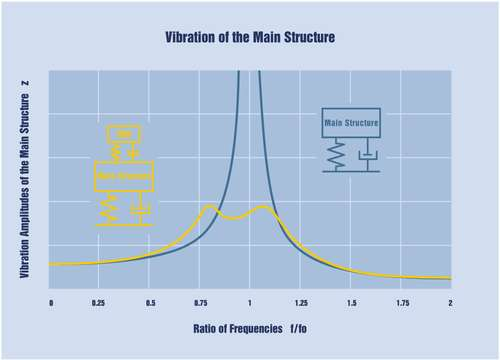



On a first approximation, the machine acted on by this forcing can be modeled as a simple 1-DOF spring mass system on which a force $f(t)$ is acting. 

In the previous section we saw that if we connect another spring mass system with natural frequency close to that of the machine then the amplitude of vibration of the  machine becomes zero for a forcing frequncy equal to the nautaral frequancy of the machine.

However the addition of this second system makes the composite system a 2-DOF system. The composite 2-DOF  has two modes of vibration and hence two resonance frequencies.  If these two resonance frequencies fall inside the operating frequencies of the machine resonance will occur now at two operating conditions. Thus the challenge is to design this added system so that the natural frequencies of the composite system lie well outside the operating region of the machine.

We see how one can proceed to do so in the following. Let $\omega_{n1}$ be the natural frequency of the machine and let $\omega_{n2}$ be the natural frequency of the added system.

Recall 
\begin{align}
\chi_1(\omega)=\left|\frac{{(\alpha\omega_{n_1}^2-\omega^2)/ m_1}}
{{\left(\omega^4-(1+\alpha+\mu\alpha)\omega_{n_1}^2\omega^2+\alpha\omega_{n_1}^4\right)}}\right|,
\end{align}
\begin{align}
\chi_2(\omega)=\left|\frac{{\alpha\omega_{n_1}^2/ m_1}}
{{\left(\omega^4-(1+\alpha+\mu\alpha)\omega_{n_1}^2\omega^2+\alpha\omega_{n_1}^4\right)}}\right|,
\end{align}
Furtermore we also have that the resonance frequencies of the coupled system are given by
\begin{align}
\omega_{1}^2&=\frac{\omega_{n1}^{2}}{2}\left( \left(\alpha \mu + \alpha + 1\right)-\sqrt{\left(\alpha \mu + \alpha + 1\right)^2-4\alpha}\right)=\frac{\omega_{n1}^{2}}{2}\left(\alpha \mu + \alpha + 1\right)\left( 1-\sqrt{1-\frac{4\alpha}{\left(\alpha \mu + \alpha + 1\right)^2}}\right)\\
\omega_{2}^2&=\frac{\omega_{n1}^{2}}{2}\left( \left(\alpha \mu + \alpha + 1\right)+\sqrt{\left(\alpha \mu + \alpha + 1\right)^2-4\alpha}\right)=\frac{\omega_{n1}^{2}}{2}\left(\alpha \mu + \alpha + 1\right)\left( 1+\sqrt{1-\frac{4\alpha}{\left(\alpha \mu + \alpha + 1\right)^2}}\right)
\end{align}


From the abobe expression we find that the steady state amplitude of mass $m_1$ reaches zero when $\omega^2=\alpha \omega_{n1}^2$ and that the amplitude of vibration of the main mass $m_1$ remains small within a certain frequency range that falls between the interval $\omega_1<\omega < \omega_2$. Since the original resonance frequancy is $\omega_{n_1}$ and the whole exersie is to ensure that we be able to operate the system safely around this frequency we have no choice but to set $\alpha\approx 1$.

**Thus the tuned mass damper design objective reduces to that of finding $\mu$ such that the range of operational frequencies of the machine falls well within the interval  $\omega_1<\omega < \omega_2$.** However from a practical point of view it is also important that $\mu$ is quite small.

Below we numertically investigate the behavior of $\omega_1$ and $\omega_2$ as $\alpha$ and $\mu$ are varied.

In [ ]:
alPha0 = np.linspace(0, 2, 100)
mu0 = np.linspace(0, 2, 100)
alPha, mu = np.meshgrid(alPha0, mu0)
w1=0.5*(alPha*mu+alPha+1)*(1-np.sqrt(1-4*alPha/(alPha*mu+alPha+1)**2))
w2=0.5*(alPha*mu+alPha+1)*(1+np.sqrt(1-4*alPha/(alPha*mu+alPha+1)**2))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Surface(z=w1))
fig.add_trace(go.Surface(z=w2))

#fig.update_layout(title='Natural Frequancies', autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(title='Natural Frequancies', autosize=False, width=500, height=500, scene=dict(xaxis=dict(title=r'\alpha'), yaxis=dict(title=r'\mu')))

fig.show()

In [ ]:
mu=.01;
alPha=np.linspace(0,2,num=100);
xx=np.sqrt(0.5*(alPha*mu+alPha+1)*(1-np.sqrt(1-4*alPha/(alPha*mu+alPha+1)**2)))
yy=np.sqrt(0.5*(alPha*mu+alPha+1)*(1+np.sqrt(1-4*alPha/(alPha*mu+alPha+1)**2)))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="lines", x=alPha, y=xx, name=r'$\omega_1^2/\omega_{n_1}^2$'))
fig.add_trace(go.Scatter(mode="lines", x=alPha, y=yy, name=r'$\omega_2^2/\omega_{n_1}^2$'))

fig.update_layout(title=r'$\mu=0.01$', xaxis=dict(title=r'$\alpha$'),yaxis=dict(title=r'$0.5\left(\alpha \mu + \alpha + 1\right)\left(1\pm \sqrt{\left(1-\frac{4\alpha}{\left(\alpha \mu + \alpha + 1\right)^2}\right)}\right)$'))
fig.show()

In [ ]:
al=1.;
mU=np.linspace(0,1,num=100);
xx=0.5*((al*mU+al+1)*(1-np.sqrt(1-4*al/(al*mU+al+1)**2)))
yy=0.5*((al*mU+al+1)*(1+np.sqrt(1-4*al/(al*mU+al+1)**2)))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="lines", x=mU, y=xx, name=r'$\omega_1^2/\omega_{n_1}^2$'))
fig.add_trace(go.Scatter(mode="lines", x=mU, y=yy, name=r'$\omega_2^2/\omega_{n_1}^2$'))

fig.update_layout(title=r'$\alpha=1$', xaxis=dict(title=r'$\mu$'),yaxis=dict(title=r'$0.5\left(\alpha \mu + \alpha + 1\right)\left(1\pm \sqrt{\left(1-\frac{4\alpha}{\left(\alpha \mu + \alpha + 1\right)^2}\right)}\right)$'))
fig.show()

The abobe figure shows that in order to increase the operating region $(\omega_2-\omega_1)$ one has to increase $\mu=m_2/m_1$. However from a poractical point of view it is also desirable that $\mu$ is as small as possible.

### A2.1-Example:

A simple blower driven by a motor exhibits violent vibrations when the motor r.p.m is around 300. Design a spring mass damper system to ensure that the vibrations of the blower remains small for motor r.p.m in the range of 240 to 360.

#### Typical Answer

Since system can be approximated as a simple 1-DOF spring mass damper system and assuming that the damping in the structure is negligible we see that $\omega_n\approx 10\pi\,rad/s$. Since we need the system to operate in the frequancy range of $8\pi\,rad/s <\omega < 12\pi\,rad/s$. Thus we desire $\omega_1\approx 8\pi\,rad/s$ and $\omega_2\approx 12\pi\,rad/s$. Thus from the above graph we find that $\mu\approx 10$.

In [ ]:
[8*np.pi, 12*np.pi]

In [ ]:
wn1sq=(10*np.pi)**2; 
mu=0.2;
al=1.;
Omega=np.array([[wn1sq*(1+al*mu), -al*mu*wn1sq],[-al*wn1sq, al*wn1sq]])
S, V=linalg.eig(Omega);
w2=np.sqrt(S[0]); w1=np.sqrt(S[1]);
Xm2=V.T[0]; Xm1=V.T[1];
T=np.array([Xm1,Xm2]).T
linalg.inv(T)
gam=linalg.inv(T) @ np.array([1, 0])
gam1=gam[0]; gam2=gam[1];

In [ ]:
[w1, w2]

In [ ]:
w=np.logspace(1,2,1000);
Chi_0_omega=abs(1/((wn1sq-w**2)));
Chi_1_omega=abs((-(gam1*Xm1[0]+gam2*Xm2[0])*w**2+(gam1*Xm1[0]*w2**2+gam2*Xm2[0]*w1**2))/((w1**2-w**2)*(w2**2-w**2)));
Chi_2_omega=abs((-(gam1*Xm1[1]+gam2*Xm2[1])*w**2+(gam1*Xm1[1]*w2**2+gam2*Xm2[1]*w1**2))/((w1**2-w**2)*(w2**2-w**2)));

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_0_omega, name=r'$\chi_0(\omega)$' ))
fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_1_omega, name=r'$\chi_1(\omega)$' ))
fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_2_omega, name=r'$\chi_2(\omega)$' ))

fig.update_layout(xaxis=dict(type="log", title=r'$\log{\omega}$'), yaxis=dict(range=[0,.04] ,title=r'$\chi(\omega)$'), title='Amplitude Frequency Response')
fig.show()

### A2.1-Simualtion of the system for different forcing frequency regimes

1. $\omega \approx 0$
2. $\omega$ is very large
3. $\omega\approx \omega_1$
3. $\omega\approx \omega_2$

In [ ]:
c_1=0.1; c_2=0.1;
A=np.array([[0,0,1,0],[0,0,0,1],[-(k_1+k_2), k_2, -(c_1+c_2), c_2],[k_2, -k_2, c_2, -c_2]]);
B=np.array([0,0,1,0]);

#### Low frequncy response - $\omega \approx 0$

In [ ]:
omega=0; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(50,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#### High Frequency Response - $\omega$ very large


In [ ]:
omega=100; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(10,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#### $\omega \approx \omega_1$

In [ ]:
omega=w1; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(200,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#### $\omega \approx \omega_2$

In [ ]:
omega=w2; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(50,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

# Section#3: Fisrt Approximation of a Coupled Translational plus Rotational Vibratory System



A blower driven by a motor is mounted on the ground using a vibration isolation  arrangement similar to that shown in the figure below. Due to some modifications in the operation of the  system the original blower had to be replaced with a new one with an operating region between 1000 r.p.m and 2000 r.p.m. The new motor when operated at 990 r. p. m. and 1710 r. p. m. exhibited violent vibrations. You are required to design a vibration absorber to mitigate the vibrations. As a first step one would typically analyzes the approximate behavior of the system and attempt to theoretically predict its behavior. This exercise is expected guide you in learning the basics of this process.

In particular we will begin to develop the tools necessary to analyze the vibratory motion of coupled systems such as multi-story buildings, rotary machines mounted on elastic foundations, and multi-rotor shafts.   

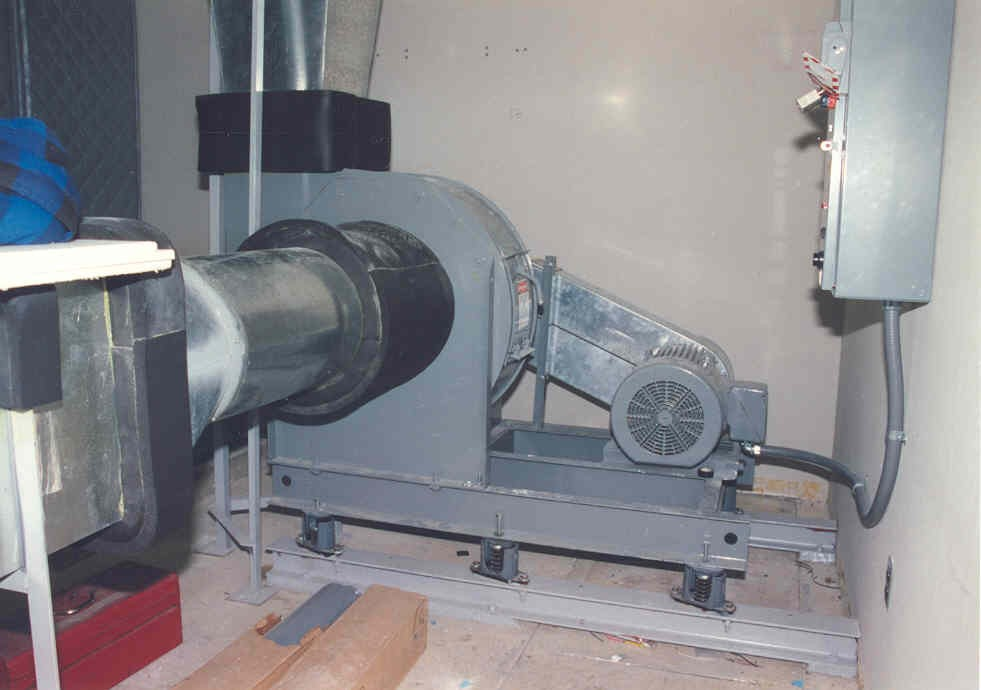


## A1-Lumped Parameter Model

In the event the following hold

1.   the motor mass and eccentricities are negligible compared to that of the blower
2.   the amplitude of motion is small

it is possible to approximate the behavior of this system by a lumped parameter system of the form shown in the figure below. Note that this is also similar to the vibration setup in the Applied Mechanics lab.

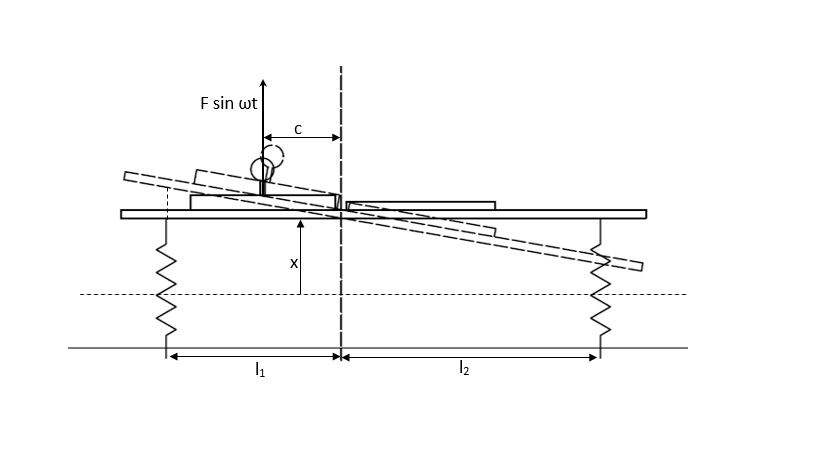 



Applying Newton's equations for the rotating and translating plate we obtain the following coupled set of second order ODEs

\begin{align}
M\ddot{x}&=-2k\, x + k(l_2-l_1)\,\theta-2b\, \dot{x} + b(l_2-l_1)\,\dot{\theta}+f(t)\\
I\ddot{\theta}&=k(l_2-l_1)\,x -k(l_1^2+l_2^2)\,\theta +b(l_2-l_1)\,\dot{x} -b(l_1^2+l_2^2)\,\dot{\theta}+cf(t)
\end{align}

This can be represented as a Matrix second order linear ODE of the form
\begin{align}
M\ddot{Y}+C\dot{Y}+KY=F(t),
\end{align}
where
\begin{align}
Y(t)=\begin{bmatrix} x(t)\\ \theta (t)\end{bmatrix},\:\:\:\:
F(t)=f(t)\begin{bmatrix}1\\ c\end{bmatrix},\:\:\:\:
M=\begin{bmatrix} m & 0\\0 & I\end{bmatrix},
\end{align}
\begin{align}
C=\begin{bmatrix} 2b & -b(l_2-l_1)\\ -b(l_2-l_1) & b(l_1^2+l_2^2)\end{bmatrix},\:\:\:\:
K=\begin{bmatrix} 2k & -k(l_2-l_1)\\ -k(l_2-l_1) & k(l_1^2+l_2^2)\end{bmatrix}
\end{align}

## A2-Dynamic Systems Form of the Model

\begin{align}
\dot{X}= AX+B\,f(t),
\end{align}
where
\begin{align}
X(t)=\begin{bmatrix} x(t)\\ \theta (t)\\ \dot{x}(t)\\ \dot{\theta} (t)\end{bmatrix},\:\:\:\:
B=\begin{bmatrix}0\\ 0\\ \frac{1}{m}\\ \frac{c}{I}\end{bmatrix},\:\:\:\:
A=\begin{bmatrix} 0 & 0 & 1& 0\\ 0 & 0 & 0 &1 \\ -\frac{2k}{m} & (l_2-l_1)\frac{k}{m}&-\frac{2b}{m} & (l_2-l_1)\frac{b}{m}\\ (l_2-l_1)\frac{k}{I} & -(l_1^2+l_2^2)\frac{k}{I}&(l_2-l_1)\frac{b}{I} & -(l_1^2+l_2^2)\frac{b}{I}
\end{bmatrix}
\end{align}

## A3-Simulating the dynamic system for various conditions.

Based on the simulations we will answer the followings:


1.   find the eignevalues of $A$ and discuss its influence on the behavior of the states of the system.
2.   plot the unfolced response of the system for various different initial condition of practical significance for a low damped system.
3.   plot the bheavior of the states for a sinusoidal forcing term of the form $f(t)=f_0\cos{\omega t}$ with zero initial conditions a low damped system.
4.   repeat the aboce steps with zero damping $b=0$.



In [ ]:
#The lumped parameters of the system
m=1.; k=8.; l=1.; I=m*(0.05**2+l**2)/12.; delta=l/20.; l_1=l-delta; l_2=l+delta; c=l_1/2;

#### Small Damping $b<1$

In [ ]:
b=0.05;
A=np.array([[0,0,1,0],[0,0,0,1],[-(2*k/m), (l_2-l_1)*(k/m), -(2*b/m), (l_2-l_1)*(b/m)],[(l_2-l_1)*k/I, -(l_2**2+l_1**2)*k/I, (l_2-l_1)*b/I, -(l_2**2+l_1**2)*b/I]]);
B=np.array([0,0,1/m,c/I]);

In [ ]:
S, V=linalg.eig(A)

In [ ]:
S

##### Eigenvalue for small damping
All eignenvalues are located in the strict left half complex plane. Thus the initial condition response and the transient response will both approach zero exponentially.

##### Initial Condition Response
We let $f(t)\equiv 0$

In [ ]:
omega=0; f0=0; ICs=[0,np.pi/6,0,0]
yy=mv.simulateDySystem(5,0.01,ICs,A,B,[f0,omega],'Time / t','X(t)')

##### Sinusoidal forcing responce
We let $f(t)=f_0\cos{\omega t}$.


In [ ]:
omega=5; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(5,0.01,ICs,A,B,[f0,omega],'Time / t','X(t)')

#### Negligibly small damping $b\approx 0$

In [ ]:
b=0;
A=np.array([[0,0,1,0],[0,0,0,1],[-(2*k/m), (l_2-l_1)*(k/m), -(2*b/m), (l_2-l_1)*(b/m)],[(l_2-l_1)*k/I, -(l_2**2+l_1**2)*k/I, (l_2-l_1)*b/I, -(l_2**2+l_1**2)*b/I]]);
B=np.array([0,0,1/m,c/I]);

In [ ]:
S, V=linalg.eig(A)

In [ ]:
S

##### Eigenvalues for no damping
Considering the precision of  machine computation it is clear that all the eigenvalues of the system are on the imaginary axis of the complex plane. Thus the Initial condition response and the 'transient' part of the response will persist.

##### Initial Condition Response
We let $f(t)\equiv 0$

In [ ]:
omega=0; f0=0; ICs=[0,np.pi/6,0,0]
yy=mv.simulateDySystem(10,0.01,ICs,A,B,[f0,omega],'Time / t','X(t)')

##### Sinusoidal forcing responce
We let $f(t)=f_0\cos{\omega t}$.


In [ ]:
omega=1; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(10,0.01,ICs,A,B,[f0,omega],'Time / t','X(t)')

## A4-Modal Analysis

In vibration analysis we are typically interested in near resonant conditions. That is, in cases where the system is very lightly damped and the forcing frequency is close to the resonance frequencies of the system. Since the behavior of the system depends smoothly on the damping ratios we see that the real behavior of the system will thus be described in a qualitative and approximately quantitative sense quite well by analyzing the case where the damping is zero. 

Thus in this section we will assume that the damping is negligible and hence that the system equations are approximately given by
\begin{align}
\ddot{Y}+\Omega Y=M^{-1}F(t),
\end{align}
where
\begin{align}
\Omega=M^{-1}K=
\begin{bmatrix}\omega_{n1}^2& -(l_1^2+l_2^2)\mu\omega_{n1}^2\\ -2\mu\alpha\omega_{n1}^2 & \alpha\omega_{n1}^2\end{bmatrix}.
\end{align}
with
\begin{align}
\omega_{n1}^2=\frac{2k}{m},\:\:\:\omega_{n2}^2=\frac{k(l_1^2+l_2^2)}{I},
\:\:\:\mu=\frac{(l_2-l_1)}{2(l_1^2+l_2^2)},\:\:\:\:\alpha=\frac{\omega_{n2}^2}{\omega_{n1}^2}={\frac{m(l_1^2+l_2^2)}{2I}},
\end{align}

Let $\omega_1^2,\omega_2^2$ be the eignevalues of $\Omega$ and 
\begin{align*}
\bar{Y}_{m_1}&\triangleq \begin{bmatrix}\bar{x}_{m1}\\ \bar{\theta}_{m1}\end{bmatrix},\:\:\:\:\:\:
\bar{Y}_{m_2}\triangleq \begin{bmatrix} \bar{x}_{m2}\\ \bar{\theta}_{m2} \end{bmatrix}
\end{align*}
be the corresponding eigenvectors.

### A4.1-Symbolic Computation of the Natural Frequancies and Modeshapes

In [ ]:
from sympy import symbols
from sympy import *

In [ ]:
omega_n1, l1, l2, mu, alpha=symbols('omega_n1 l1 l2 mu alpha');
Omega=Matrix([[omega_n1**2, -(l1**2+l2**2)*mu*omega_n1**2],[-2*mu*alpha*omega_n1**2, alpha*omega_n1**2]]);

##### Symbolic computation of the Eignevalues of $\Omega$

In [ ]:
Omega.eigenvals()

#### Symbolic computation of the Natural Frequencies $\omega_1$ and $\omega_2$

In [ ]:
omega_1_sq=[*Omega.eigenvals()][0]
omega_2_sq=[*Omega.eigenvals()][1]

In [ ]:
omega_1=sqrt(omega_1_sq);
omega_2=sqrt(omega_2_sq);

In [ ]:
latex(omega_1_sq)

In [ ]:
latex(omega_2_sq)

The eigenvalues are
\begin{align}
\omega_{1}^2&=\frac{\omega_{n1}^{2} \left(\alpha + 1\right)}{2} - \frac{\omega_{n1}^{2} \sqrt{\alpha^{2} + 8 \alpha l_{1}^{2} \mu^{2} + 8 \alpha l_{2}^{2} \mu^{2} - 2 \alpha + 1}}{2}\\
\omega_{2}^2&=\frac{\omega_{n1}^{2} \left(\alpha + 1\right)}{2} + \frac{\omega_{n1}^{2} \sqrt{\alpha^{2} + 8 \alpha l_{1}^{2} \mu^{2} + 8 \alpha l_{2}^{2} \mu^{2} - 2 \alpha + 1}}{2}
\end{align}

#### Symbolic computation of the eignevectors $\bar{Y}_{m_1}$ and $\bar{Y}_{m_2}$

In [ ]:
Ybar_m1=Omega.eigenvects()[0][2][0]
Ybar_m2=Omega.eigenvects()[1][2][0]

In [ ]:
latex(Ybar_m1)

In [ ]:
latex(Ybar_m2)

The corresponding eigenvectors are:
\begin{align}
\bar{Y}_{m1}&=
\begin{bmatrix}- \frac{2 l_{1}^{2} \mu + 2 l_{2}^{2} \mu}{\alpha - \sqrt{\alpha^{2} + 8 \alpha l_{1}^{2} \mu^{2} + 8 \alpha l_{2}^{2} \mu^{2} - 2 \alpha + 1} - 1}\\1\end{bmatrix}\\
\bar{Y}_{m2}&=
\begin{bmatrix}- \frac{2 l_{1}^{2} \mu + 2 l_{2}^{2} \mu}{\alpha + \sqrt{\alpha^{2} + 8 \alpha l_{1}^{2} \mu^{2} + 8 \alpha l_{2}^{2} \mu^{2} - 2 \alpha + 1} - 1}\\1\end{bmatrix}
\end{align}

### A4.2-Normal form transformation

Let $T\triangleq [\bar{Y}_{m_1}\:\:\:\bar{Y}_{m_2}]$

Then we see that $\Omega T=TD$ where
\begin{align}
D\triangleq \begin{bmatrix}\omega_1^2 & 0\\0 &\omega_2^2
\end{bmatrix}.
\end{align}

Thus if we define $Y\triangleq Tz$ where $z=[z_1\:\:\:z_2]^T$,
then the equations above reduce to the form $\ddot{z}+T^{-1}\Omega Tz=\ddot{z}+Dz=T^{-1}M^{-1}F$.  Then these equations take the explicit form
\begin{align*}
\ddot{z}_1+\omega_1^2z_1&=\gamma_1\,f(t),\\
\ddot{z}_2+\omega_2^2z_2&=\gamma_2\,f(t).
\end{align*}
where
\begin{align}
T^{-1}\begin{bmatrix}
\frac{1}{m}\\\frac{c}{I}
\end{bmatrix}&=\begin{bmatrix}
\gamma_1\\\gamma_2
\end{bmatrix}
\end{align}

#### Summary 

Thus we see that 
\begin{align*}
Y&=
z_1(t)\begin{bmatrix}\bar{x}_{m1}\\ \bar{\theta}_{m1}\end{bmatrix}+
z_2(t)\begin{bmatrix} \bar{x}_{m2}\\ \bar{\theta}_{m2} \end{bmatrix}
\end{align*}
where $z_1(t)$ and $z_2(t)$ can be approximated by the solutions of the uncoupled forced spring mass damper systems of the form
\begin{align*}
\ddot{z}_1+\omega_1^2z_1&=\gamma_1\,f(t),\\
\ddot{z}_2+\omega_2^2z_2&=\gamma_2\,f(t),
\end{align*}
where 
\begin{align}
\omega_1 &= \omega_{n1}\left(\frac{(1+\alpha)-\sqrt{(1+\alpha)^2-4\alpha(1-2\mu^2(l_1^2+l_2^2))}}{2}\right)^{\frac{1}{2}},\\
\omega_2 &= \omega_{n1}\left(\frac{(1+\alpha)+\sqrt{(1+\alpha)^2-4\alpha(1-2\mu^2(l_1^2+l_2^2))}}{2}\right)^{\frac{1}{2}},
\end{align}
and $\bar{Y}_{m1}\triangleq [\bar{x}_{m1}\:\:\:\:\bar{\theta}_{m2}]^T$ and $\bar{Y}_{m2}\triangleq [\bar{x}_{m2}\:\:\:\:\bar{\theta}_{m2}]^T$ are the eigenvectors of $\Omega$ corresponding to the eigenvalues $\omega_1^2$ and $\omega_2^2$ with

\begin{align}
\frac{\bar{x}_{m1}}{\bar{\theta}_{m1}} &=&\frac{2(l_1^2+l_2^2)\mu}{1-\alpha+\sqrt{(1+\alpha)^2-4\alpha(1-2\mu^2(l_1^2+l_2^2))}},\\
\frac{\bar{x}_{m2}}{\bar{\theta}_{m2}} &=&\frac{2(l_1^2+l_2^2)\mu}{1-\alpha-\sqrt{(1+\alpha)^2-4\alpha(1-2\mu^2(l_1^2+l_2^2))}}
\end{align}


or alternatively as


\begin{align}
\frac{\bar{x}_{m1}}{\bar{\theta}_{m1}} &=&\frac{(\alpha-1)+\sqrt{(1+\alpha)^2-4\alpha(1-2\mu^2(l_1^2+l_2^2))}}{4\mu\alpha},\\
\frac{\bar{x}_{m2}}{\bar{\theta}_{m2}} &=&\frac{(\alpha-1)-\sqrt{(1+\alpha)^2-4\alpha(1-2\mu^2(l_1^2+l_2^2))}}{4\mu\alpha}.
\end{align}

#### Sinusoidal Response: $f(t)=f_0\cos{\omega t}$

Since $Y=Tz$ we have that for a system with negligible damping
\begin{align}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix}
\approx Y=z_1(t)\,\bar{Y}_{m_1}+z_2(t)\,\bar{Y}_{m_2}.
\end{align}
Using Laplace transforms we find that the steady state reponse (once the transients have died out) of $\ddot{z}_i+\omega_i^2z_i=\gamma_i f(t)$ is given by
\begin{align}
z_i(t)&=\mathcal{L}^{-1}\left\{\frac{\gamma_i}{s^2+\omega_i^2}\,F(s)\right\}=
f_0\gamma_i\mathcal{L}^{-1}\left\{\frac{1}{s^2+\omega_i^2}\,\frac{s}{s^2+\omega^2}\right\}=
\gamma_if_0\,\chi_i(\omega)\cos{(\omega t +\phi_i(\omega))}
\end{align}
where
\begin{align*}
\chi_i(\omega)&=\left|\frac{1}{-\omega^2+\omega^2_i}\right|,\\
\phi_i(\omega)&={\large\angle}\frac{1}{-\omega^2+\omega^2_i}
\end{align*}

Thus we see that for sinusoidal forcing, $f(t)=f_0\cos{\omega t}$,

\begin{align*}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix} &\approx \gamma_1f_0\,\chi_1(\omega)\cos{(\omega t +\phi_1(\omega))}{\bar{Y}_{m_1}}+\gamma_2f_0\,\chi_2(\omega)\cos{(\omega t +\phi_2(\omega))}{\bar{Y}_{m_2}}.
\end{align*} 

The expression for $\chi_i(\omega)$ shown above clearly shows that the amplitude of the motion is magnified by an extremely large value for exciting frequwncies $\omega$ near the frequency $\omega_i$. This phenomena is called **resonance**. For this system there exisits two resonance frequencies $\omega_1, \omega_2$. 

Since when $\omega\approx \omega_1$ the amplitude magnification $\chi_1(\omega) >>\chi_2(\omega)$ and when $\omega\approx \omega_2$ the amplitude magnification $\chi_1(\omega) <<\chi_2(\omega)$ we see that when $\omega\approx \omega_i$

\begin{align*}
\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix}
&\approx f_0\gamma_i\chi_i(\omega)\cos{(\omega t +\phi_i(\omega))}{\bar{Y}_{m_i}}
\end{align*} 
In such a case the *shape* of the motion is given by the eignevector $\bar{Y}_{m_i}$



## A5-The Frequency Response of the System

Taking the Laplace transform of
\begin{align}
Y(t)=z_1(t)\,\bar{Y}_{m_1}+z_2(t)\,\bar{Y}_{m_2}.
\end{align}
we have
\begin{align}
\mathcal{L}\left\{\begin{bmatrix}
x(t)\\
\theta(t)
\end{bmatrix}\right\}
&= \mathcal{L}\left\{Y(t)\right\}=\mathcal{L}\left\{z_1(t)\right\}\,\bar{Y}_{m_1}+\mathcal{L}\left\{z_2(t)\right\}\,\bar{Y}_{m_2},\\
&=\left(\frac{\gamma_1}{s^2+\omega_1^2}F(s)\right)\,\bar{Y}_{m_1}+\left(\frac{\gamma_2}{s^2+\omega_2^2}F(s)\right)\,\bar{Y}_{m_2}\\
&=\begin{bmatrix} \frac{(\gamma_1\bar{x}_{m_1}+\gamma_2\bar{x}_{m_2})s^2+(\gamma_1\bar{x}_{m_1}\omega_2^2+\gamma_2\bar{x}_{m_2}\omega_1^2)}{(s^2+\omega_1^2)(s^2+\omega_2^2)}\\
\frac{(\gamma_1\bar{\theta}_{m_1}+\gamma_2\bar{\theta}_{m_2})s^2+(\gamma_1\bar{\theta}_{m_1}\omega_2^2+\gamma_2\bar{\theta}_{m_2}\omega_1^2)}{(s^2+\omega_1^2)(s^2+\omega_2^2)}
  \end{bmatrix}F(s).
\end{align}

Let
\begin{align}
G_x(s)&=\frac{(\gamma_1\bar{x}_{m_1}+\gamma_2\bar{x}_{m_2})s^2+(\gamma_1\bar{x}_{m_1}\omega_2^2+\gamma_2\bar{x}_{m_2}\omega_1^2)}{(s^2+\omega_1^2)(s^2+\omega_2^2)}\\
G_\theta(s)&=\frac{(\gamma_1\bar{\theta}_{m_1}+\gamma_2\bar{\theta}_{m_2})s^2+(\gamma_1\bar{\theta}_{m_1}\omega_2^2+\gamma_2\bar{\theta}_{m_2}\omega_1^2)}{(s^2+\omega_1^2)(s^2+\omega_2^2)}.
\end{align}


Then from above we see that $\mathcal{L}\{x(t)\}=X(s)=G_x(s)F(s)$ and $\mathcal{L}\{\theta(t)\}=\Theta(s)=G_\theta(s)F(s)$. Thus when $f(t)=f_0\cos{\omega t}$ we see that the steady stat reponses (for negligibly damped systems) are approximately given by
\begin{align}
x(t)&\approx f_0\chi_x(\omega)\cos{\left(\omega t+\phi_x(\omega)\right)}\\
\theta(t)&\approx f_0\chi_\theta(\omega)\cos{\left(\omega t+\phi_\theta(\omega)\right)}
\end{align}
where
\begin{align}
\chi_x(\omega)&=\left|G_x(i\omega)\right|,\:\:\:\:\:\phi_x(\omega)=\angle G_x(i\omega)\\
\chi_\theta(\omega)&=\left|G_\theta(i\omega)\right|,\:\:\:\:\:\phi_\theta(\omega)=\angle G_\theta(i\omega)
\end{align}

## A6-Numerical Computation of the Modes


In [ ]:
m=1.; k=1.; l=1.; I=m*(l**2+(2*l)**2)/12.; delta=l/10.; l_1=l-delta; l_2=l+delta; c=l_1/2;
wn1sq=2*k/m;
wn2sq=k*(l_1**2+l_2**2)/I;
mu=0.5*(l_2-l_1)/(l_1**2+l_2**2);
al=wn2sq/wn1sq

In [ ]:
Omega=np.array([[wn1sq, -(l_1**2+l_2**2)*mu*wn1sq],[-2*mu*al*wn1sq, al*wn1sq]])
S, V=linalg.eig(Omega);
w2=np.sqrt(S[1]); w1=np.sqrt(S[0]);
zm2=V.T[1]; zm1=V.T[0];

In [ ]:
[w1, w2]

In [ ]:
T=np.array([zm1,zm2]).T

In [ ]:
linalg.inv(T)

In [ ]:
gam=linalg.inv(T) @ np.array([1/m, c/I])
gam1=gam[0]; gam2=gam[1];

###### The Mode Shape

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=['x','$\\theta$'], y=zm1, name=r'$\omega\approx \omega_1$' ))
fig.add_trace(go.Scatter(mode="markers", x=['x','$\\theta$'], y=zm2, name=r'$\omega\approx \omega_2$' ))

fig.update_xaxes(title='Variable') # log range: 10^0=1, 10^5=100000
fig.update_yaxes(title='Maximum Amplitude') # linear range
fig.show()

#### Frequency Response of the System

In [ ]:
w=np.logspace(-1,1,1000);
Chi_x_omega=abs((-(gam1*zm1[0]+gam2*zm2[0])*w**2+(gam1*zm1[0]*w2**2+gam2*zm2[0]*w1**2))/((w1**2-w**2)*(w2**2-w**2)));
Chi_theta_omega=abs((-(gam1*zm1[1]+gam2*zm2[1])*w**2+(gam1*zm1[1]*w2**2+gam2*zm2[1]*w1**2))/((w1**2-w**2)*(w2**2-w**2)));

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_x_omega, name=r'$\chi_x(\omega)$' ))
fig.add_trace(go.Scatter(mode="markers", x=w, y=Chi_theta_omega, name=r'$\chi_\theta(\omega)$' ))

fig.update_xaxes(type="log", range=[-1,1], title=r'$\log{\omega}$') # log range: 10^0=1, 10^5=100000
fig.update_yaxes(range=[0,5], title=r'$\chi(\omega)$') # linear range
fig.show()

## A7-Simualtion of the system for different forcing frequency regimes

1. $\omega \approx 0$
2. $\omega$ is very large
3. $\omega\approx \omega_1$
3. $\omega\approx \omega_2$

In [ ]:
b=0.5;
A=np.array([[0,0,1,0],[0,0,0,1],[-(2*k/m), (l_2-l_1)*(k/m), -(2*b/m), (l_2-l_1)*(b/m)],[(l_2-l_1)*k/I, -(l_2**2+l_1**2)*k/I, (l_2-l_1)*b/I, -(l_2**2+l_1**2)*b/I]]);
B=np.array([0,0,1/m,c/I]);

#### Low frequncy response - $\omega \approx 0$

In [ ]:
omega=0; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(10,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#### High Frequency Response - $\omega$ very large


In [ ]:
omega=100; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(10,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#### $\omega \approx \omega_1$

In [ ]:
omega=w1; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(50,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#### $\omega \approx \omega_2$

In [ ]:
omega=w2; f0=1; ICs=[0,0,0,0]
yy=mv.simulateDySystem(50,0.01,ICs,A,B,[f0,omega],'Time/t','X(t)')

#Section #4 - Vibration of Spatially Distributed Systems

## Examples

### Example #1 - Vibration of an Axially Loaded Beam

Consider for example the axially loaded pinned-pined beam shown in the figure below: Figure taken from https://www.p-a-hilton.co.uk/products/vibration-hvt/beam-bending-transverse-vibrations-module)



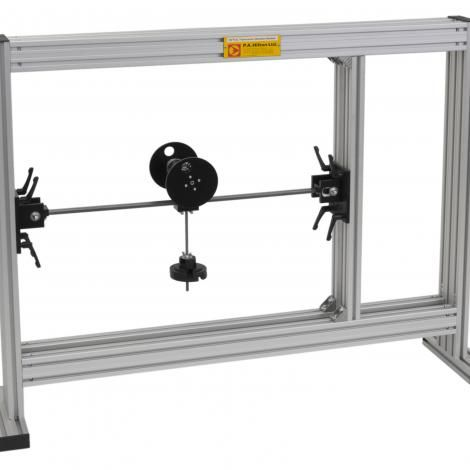

It can be shown that, if the damping in the system is negligible and the displacements are small then the motion of the system is sufficiently accurately described by the solutions of the partial differential equation given by

\begin{align}{{\partial^2 y} \over {\partial t^2}} +\frac{EI} {\rho A}{{\partial^4 y} \over {\partial x^4}}+\frac{P}{\rho A} {{\partial^2 y} \over {\partial x^2}}&=q(t,x)\end{align}

where $y$ is the transverse displacement of the beam, $P$ is the axial compressive force, $\rho$ is the density of the material of the beam, and $E$ is the modulus of rigidity, $I$ is the cross sectional moment of inertia, and $A$ is the cross sectional area of the uniform beam. In this section we will consider the case where the axial load is a constant.

The solutions of the above PDE that satisfy the boundary conditions

\begin{align}y(0,t)&=0,\:\:\:\:\:\:\: y(L,t)=0,\\{\partial^2 y \over \partial x^2}(0,t)&=0,\:\:\:\:\:\:\: {\partial^2 y \over \partial x^2}(L,t)=0,\end{align}

where $L$ is the length of the beam approximately describes the physical behavior of the system.

Let $\mathcal{F}$ be the infintie dimensional vector space of twice differentiable functions defined on the interval $[0,L]$. Then $H: \mathcal{F}\mapsto \mathcal{F}$ defined by 

\begin{align} H&=\frac{EI} {\rho A}{{\partial^4 } \over {\partial x^4}}+\frac{P_o}{\rho A} {{\partial^2 } \over {\partial x^2}}\end{align}

is a linear operator on $\mathcal{F}$ and the equations of motion take the form

\begin{align}{{\partial^2 y} \over {\partial t^2}} +Hy&=q(t,x)\end{align}

Notice the similarity with the finitie dimensional case of 

\begin{align}{{d^2 x} \over {d t^2}} +\Omega x&=f(t)\end{align}

Thus we extend the same procedure that we adopted in the previous section to the analysis of vibrations of this system as well. We will do so in a way that is as general as possible.

###Example #2 - Whirling of Shafts

Consider the schematic of a rotating shaft that is shown below.

Figure copied from: https://www.researchgate.net/publication/325592435_A_physical_approach_to_dissipation-induced_instabilities

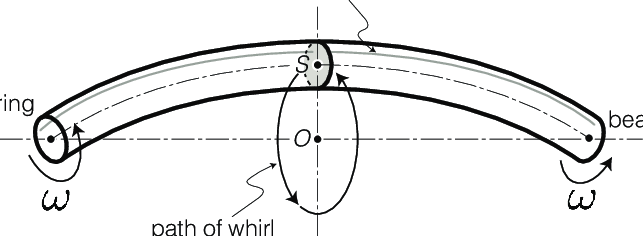

One can show that the transverse deflection
of the rotating shaft can be approximately modeled by
\begin{align*}
{{\partial^2 y} \over {\partial t^2}} +\frac{EI} {\rho A}{{\partial^4 y} \over {\partial x^4}}-\frac{EI}{\kappa G A} {{\partial^4 y} \over {\partial t^2\partial x^2}}&=q(t,x).
\end{align*}
The shaft is simply supported at the ends and hence satisfy the boundary conditions
\begin{align*}
y(0,t)&=0,\:\:\:\:\:\:\: y(L,t)=0,\\
{\partial^2 y \over \partial x^2}(0,t)&=0,\:\:\:\:\:\:\: {\partial^2 y \over \partial x^2}(L,t)=0.
\end{align*}

Again wesee that this equation can be written as

\begin{align}{{\partial^2 y} \over {\partial t^2}} +Hy&=q(t,x)\end{align}

where 


\begin{align} 
H&=\frac{EI} {\rho A}{{\partial^4} \over {\partial x^4}}-\frac{EI}{\kappa G A} {{\partial^4} \over {\partial t^2\partial x^2}}
\end{align}

is a linear operator on the infintie dimensional vector space of four times differentiable functions defined on the interval $[0,L]$ that will denote by $\mathcal{F}$.

### Example #3 - Vibration of a thin membrane

Consider the vibration of a thin circular membrane such as in the case of a drum. The deflection of the membrane of such a rotationally symmetric system is most conveniently described using polar coordinates $(r,\theta)$. That is consider the deflection of the membrane to be a function of $(t,r,\theta)$. Expressing the wave equation in polar coordinates, one finds that the deflection of the membrane satisfies
\begin{align*}
\dfrac{\partial^2 y}{\partial t^2}-c^2\left(\dfrac{\partial^2 y}{\partial r^2}+\frac{1}{r}\dfrac{\partial y}{\partial r}+\frac{1}{r^2}\dfrac{\partial^2 y}{\partial \theta^2}\right)=q(t,r,\theta),
\end{align*}
and the boundary conditions $y(t,r_0,\theta)=0$.

This also can be expressed as
\begin{align}{{\partial^2 y} \over {\partial t^2}} +Hy&=q(t,r,\theta)\end{align}

where 


\begin{align} H&=-c^2\left(\dfrac{\partial^2}{\partial r^2}+\frac{1}{r}\dfrac{\partial }{\partial r}+\frac{1}{r^2}\dfrac{\partial^2 }{\partial \theta^2}\right)\end{align}

is a linear operator on $\mathcal{F}$. Here $\mathcal{F}$ is the infintie dimensional vector space of twice times differentiable functions defined on the disk of radius $r_0$ with vanishing boundary conditions on the function as well as its second derivatives.Then $H: \mathcal{F}\mapsto \mathcal{F}$ defined by 

## The series Solution to the General Problem

Let $\mathcal{F}$ denote an infinite dimensional vector space of $n$ times differentiable functions that satisfy some boundary conditions. Let 

$H: \mathcal{F}\mapsto \mathcal{F}$ be a linear operator on $\mathcal{F}$ ($n$ depends on $H$) and consider the second order linear PDE

\begin{align}{{\partial^2 y} \over {\partial t^2}} +Hy&=q(t,x)\end{align}

Let $H$ have distinct positive eignevalues $\{\omega_i^2\}_{i=1}^\infty$ with corrsponding eigenvectors $\{\psi_i(x)\}_{i=1}^\infty$.

Let $\langle\langle \cdot,\cdot\rangle\rangle :\mathcal{F}\times \mathcal{F}\to \mathbb{R}$ be an inner product on $\mathcal{F}$ such that the eigenvectors are orthonormal with respect to each other. That is $\langle\langle \psi_i(x),\psi_j(x)\rangle\rangle =\delta_{ij}$ for all $i,j$.

Then similar to the case in the finite diemsions one easily sees that the steady state solution of the second order ODE can be written down as

\begin{align*}y(t,x)&=\sum_{i=1}^\infty z_i(t)\,\psi_i(x)\end{align*}

where the $z_i(t)$ satisfy

\begin{align*}\ddot{z}_i+\omega_i^2z_i&= \langle\langle \psi_i(x),q(t,x)\rangle\rangle = \gamma_i(t)\end{align*}

If $q(t,x)=\cos{(\omega t)}f(x)$ then the steady state solution takes the form

\begin{align}
y(t,x)=\sum_{i=1}^\infty\chi_i(\omega)\cos{(\omega t+\phi_i(\omega))}\psi_i(x)
\end{align}

where

\begin{align*}\chi_i(\omega)&=\left|\frac{\langle\langle \psi_i(x),f(x)\rangle\rangle}{-\omega^2+\omega^2_i}\right|,\\ \phi_i(\omega)&={\large\angle}\frac{1}{-\omega^2+\omega^2_i}\end{align*}

### Example #1 - The axially loaded Beam

In the case of the axially loaded beam $\mathcal{F}$ is the infintie dimensional vector space of twice differentiable functions defined on the interval $[0,L]$ with vanishing boundary conditions on the functions as well as their second derivatives and 
\begin{align}H=\frac{EI} {\rho A}{{\partial^4} \over {\partial x^4}}+\frac{P}{\rho A} {{\partial^2} \over {\partial x^2}}.
\end{align}
We find that the eigenvalues of $H$ are givven by
\begin{align}\left\{\frac{k^2\pi^2}{\rho AL^2}\left(\frac{EIk^2\pi^2}{L^2}-P\right)\right\}_{k=1}^\infty,
\end{align} 
and the corresponding eigenvectors are given by 
$\left\{\sin{\left(\frac{k\pi x}{L}\right)}\right\}_{k=1}^\infty$ when $P< P_{{cr}} \triangleq \frac{EI\pi^2}{L^2}$. They are orthonormal with respect to the inner product defined by

\begin{align*}\langle\langle f,g\rangle \rangle= \frac{2}{L}\int_0^Lf(x)g(x)\,dx.
\end{align*}

Thus the steady state solution takes the form

$y(t,x)=\sum_{k=1}^\infty\chi_k(\omega)\cos{(\omega t+\phi_k(\omega))}\sin{\left(\frac{k\pi x}{L}\right)}$

where, if $q(t,x)=\cos{(\omega t)}f(x)$, then
\begin{align*}\omega_k^2&=\frac{k^2\pi^2}{\rho AL^2}\left(\frac{EIk^2\pi^2}{L^2}-P\right)\\ \chi_k(\omega)&=\left|\frac{\langle\langle \psi_k(x),f(x)\rangle\rangle}{-\omega^2+\omega^2_k}\right|,\\ \phi_k(\omega)&={\large\angle}\frac{1}{-\omega^2+\omega^2_k}\end{align*}

Notice that 
\begin{align}
P\geq P_{{cr}} \triangleq \frac{EIk^2_0\pi^2}{L^2}
\end{align}
the eigenvalues are no longer positive. The following note has a very comprehensive discussion abouth this case.

https://nonlineardynamics.pratt.duke.edu/sites/nonlineardynamics.pratt.duke.edu/files/u32/Workshop3%20copy.pdf

In the case where $P< P_{{cr}} \triangleq \frac{EI\pi^2}{L^2}$ the first three mode shapes are plotted below:

In [ ]:
L=1
x=np.array([xx for xx in np.linspace(0,L,101)])
fig=go.Figure()
for k in range(7):
    y=np.sin(k*np.pi*x/L)
    fig.add_trace(go.Scatter(x=x,y=y))
fig.show()

Consider a beam with the following parameters that is excited by a point load (motor for example) located at the center of the beam. Let the forcing frequency be denoted by $\omega$.

In this case $q(t,x)=f_0\cos{(\omega t)}\delta\left(x-\frac{L}{2}\right)$. The beam parametrs are:

In [ ]:
#Steel, Structural ASTM-A36
a=1e-2; b=5e-3;
E=200e9 #GPa
I=a*b**3/12
rho=7850 #kg/m^3
P=100 #N
L=1 #m
A=a*b
f_0=1e-1
omega=2*np.pi*50

Then we have
\begin{align*}
\chi_k(\omega)&=\left|\frac{\langle\langle \psi_k(x),f(x)\rangle\rangle}{-\omega^2+\omega^2_k}\right|=\frac{2f_0}{L}\left|\frac{\sin{\left( \frac{k\pi}{2}\right)}}{-\omega^2+\omega^2_k}\right|
\end{align*}
Notice that $\chi_k(\omega)\equiv 0$ when $k=2,4,6,\cdots$

We also see that for $k$ such that $\omega_k>\omega$ the phase shift $\phi_k(\omega)\equiv 0$ and for $k$ such that $\omega_k<\omega$ the phase shift $\phi_k(\omega)\equiv \pi$

In [ ]:
k=symbols('k',real=True)
omega_k=sqrt(((k**2*np.pi**2)/(rho*A*L**2))*((E*I*k**2*np.pi**2)/(L**2)-P))
chi_k=(2*f_0/L)*sin(k*np.pi/2)/(-omega**2+omega_k**2)

In [ ]:
k_k=np.linspace(1,10,10)
omega_kk=[float(omega_k.subs({k:n})) for n in k_k]
chi_kk=[float(abs(chi_k.subs({k:n}))) for n in k_k]
phi_kk=np.array([])
for wk in omega_kk:
    
    if wk<omega:
        phi_kk=np.append(phi_kk, np.pi)
    else:
        phi_kk=np.append(phi_kk, 0)

In [ ]:
omega, omega_kk, chi_kk, phi_kk

In [ ]:
fig_w_k=go.Figure()
fig_w_k.add_trace(go.Scatter(x=k_k,y=omega_kk))
fig_w_k.update_layout(title='$\omega_k\:\: \mathrm{vs}\:\: k$', yaxis_title="$\omega_k$",
    xaxis_title="$k$")
fig_w_k.show()

In [ ]:
fig_chi_k_sq=go.Figure()
fig_chi_k_sq.add_trace(go.Scatter(x=k_k,y=chi_kk))
fig_chi_k_sq.update_layout(title='$\chi(\omega_k)\:\: \mathrm{vs}\:\: k$', yaxis_title="$\chi(\omega_k)$",
    xaxis_title="$k$")
fig_chi_k_sq.show()

From the above figure we see that if the forcing frequency is around 50 Htz then the solution is sufficiently accurately given by the 1,3,5 modes. That is

\begin{align}
y(t,x)\approx\chi_1(\omega)\cos{(\omega t+\phi_1(\omega))}\psi_1(x)+\chi_3(\omega)\cos{(\omega t+\phi_3(\omega))}\psi_3(x)+\chi_5(\omega)\cos{(\omega t+\phi_5(\omega))}\psi_5(x)
\end{align}

In [ ]:
t, x=symbols('t, x',real=True)
yhat=chi_kk[0]*cos(omega*t+phi_kk[0])*sin(np.pi*x/L)
for nn in [2,4]:
    yhat=yhat+chi_kk[nn]*cos(omega*t+phi_kk[nn])*sin((nn+1)*np.pi*x/L)

In [ ]:
yhat

In [ ]:
xx=np.linspace(0,L,11)
tt=np.linspace(0,.1,101)
y_tx=np.zeros((len(tt),len(xx)))
for it,ti in enumerate(tt):
    for ix,xt in enumerate(xx):
        y_tx[it,ix]=yhat.subs({x:xt,t:ti})

In [ ]:
y_tx.min()

In [ ]:
fig_y_tx=go.Figure()
for ti in [1,2,3,4,5,6,7,8,9,10]:
    fig_y_tx.add_trace(go.Scatter(x=xx,y=y_tx[ti,:]))
fig_y_tx.show()

In [ ]:
mv.animate_2D_scatter_plot(xx, y_tx, 'x','y','test')

### Example #2 - The Whirling Shaft

In the case of the whirling shaft $\mathcal{F}$ is the infintie dimensional vector space of four times differentiable functions defined on the interval $[0,L]$ with vanishing boundary conditions on the functions as well as their second and fourth derivatives and that the shaft vibrations are described by
\begin{align}
\left(1-\frac{EI}{\kappa G A} {{\partial^2 } \over {\partial x^2}}\right){{\partial^2 y}\over {\partial^2 t}}+\frac{EI} {\rho A}{{\partial^4y} \over {\partial x^4}}&=q(t,x).
\end{align} 

We find that the functions are orthonormal with respect to the inner product defined by
\begin{align*}\langle\langle f,g\rangle \rangle= \frac{2}{L}\int_0^Lf(x)g(x)\,dx\end{align*}
$\left\{\sin{\left(\frac{k\pi x}{L}\right)}\right\}_{k=1}^\infty$ and hence provide an orthonormal basis for the solution space $\mathcal{F}$.

Then
\begin{align}
y(t,x)=\sum_{i}^{\infty}z_i(t)\sin{\left(\frac{k\pi x}{L}\right)}.
\end{align}


Substituting the above expression in the system equations we have that 

\begin{align}
\ddot{z}_k+\omega_k^2\,z_k&=\gamma_k(t)
\end{align}
where
\begin{align}
\omega_k^2=\frac{\frac{EI} {\rho A}\left(\frac{k\pi}{L}\right)^4}{\left(1+\frac{EI}{\kappa G A}\left(\frac{k\pi}{L}\right)^2\right)},
\end{align} 
and 
\begin{align*}\gamma_k(t)=\frac{\left\langle\left\langle \sin{\left(\frac{k\pi x}{L}\right)},q(t,x)\right\rangle \right\rangle}{\left(1+\frac{EI}{\kappa G A}\left(\frac{k\pi}{L}\right)^2\right)}\end{align*}




Thus if $q(t,x)=f(x)\cos{(\omega t)}$ then the steady state solution takes the form
$y(t,x)=\sum_{k=1}^\infty\chi_k(\omega)\cos{(\omega t+\phi_k(\omega))}\sin{\left(\frac{k\pi x}{L}\right)}$

where
\begin{align*}\omega_k^2&=\frac{\frac{EI} {\rho A}\left(\frac{k\pi}{L}\right)^4}{\left(1+\frac{EI}{\kappa G A}\left(\frac{k\pi}{L}\right)^2\right)}\\ \chi_k(\omega)&=\frac{\left\langle\left\langle \sin{\left(\frac{k\pi x}{L}\right)},f(x)\right\rangle \right\rangle}{\left(1+\frac{EI}{\kappa G A}\left(\frac{k\pi}{L}\right)^2\right)}\left|\frac{1}{-\omega^2+\omega^2_k}\right|,\\ \phi_k(\omega)&={\large\angle}\frac{1}{-\omega^2+\omega^2_k}\end{align*}

### Example #3 - The Vibrating Drum

Still under construction

#Introduction to Fourirer Series and Transforms

Consider the vector space of square integrable complex valued functions defined on the finite interval $[0,L]$. Denote this space by $\mathcal{F}$. That is if $f\in \mathcal{F}$ then $f:[0,L]\to \mathbb{C}$ and $\int_0^Lf^*(x)f(x)\:dx < \infty$.

For $f,g\in \mathcal{F}$ one can easily show that

\begin{align} \langle \langle f,g\rangle \rangle &= \frac{1}{L}\int_0^Lf^*(x)g(x)\:dx \end{align}

defines an inner product on the vector space $\mathcal{F}$.

It is easy to show that the set of functions $\begin{align}\psi_k(x)=e^{i\frac{2k\pi x}{L}}\end{align}$ for any $k=0,\pm1,\pm2,\cdots,$ are orthonormal to each other with respect to this inner product. The question is do they span $\mathcal{F}$. To find the answer we seek to see if any $f\in \mathcal{F}$ can be written as a linear combination of the $\psi_k(x)$.

That is given a $f\in \mathcal{F}$ can we uniquely determine the coefficients $\alpha_k\in \mathbb{C}$ such that

\begin{align}f(x)&=\sum_{k=-\infty}^\infty \alpha_k\,\psi_k(x)=\sum_{k=-\infty}^\infty \alpha_k\,e^{i\frac{2k\pi x}{L}}.\end{align}

Using the inner product one can show that

\begin{align}\alpha_k&=\langle\langle \psi_k,f\rangle\rangle =\frac{1}{L}\int_0^Lf(x)e^{-i\frac{2k\pi x}{L}}\:dx\end{align}

Thus any $f\in \mathcal{F}$ can be uniquely expressed as above provided the infinite series converges. It can be shown that this series in fact converges. This is called the Fourier Series of $f\in \mathcal{F}$.



### Example on Fourier Series

Consider a square pulse defined on the interval $[0,1]$ that is given by
\begin{align}
f(t)&=\left\{\begin{array}{lc}1 & \mathrm{if \:\:\:\:\:} t\leq\frac{1}{2}\\
0 & \mathrm{o.w}\end{array}\right.
\end{align}
Then 
\begin{align}f(t)&=\sum_{k=-\infty}^\infty \alpha_k\,e^{i{2k\pi t}},\end{align}
and for $k\neq 0$
\begin{align}
\alpha_k&=\int_0^1f(t)e^{-i2k\pi t}\:dt=\int_0^{\frac{1}{2}}e^{-i2k\pi t}\:dt=\left.\frac{e^{-i2k\pi t}}{-i2k\pi}\right|_{0}^{\frac{1}{2}}\\
&=\frac{1}{-i2k\pi}(e^{-ik\pi}-1)=\frac{i}{2k\pi}(\cos({k\pi})-i\sin({k\pi})-1)=\frac{1}{2k\pi}\left(\sin({k\pi})+i(\cos({k\pi})-1)\right)
=\frac{i}{2k\pi}\left(\cos({k\pi})-1\right)=\frac{-i}{k\pi}\sin^2\left(\frac{k\pi}{2}\right)
\end{align}
We see that $\alpha_0=\frac{1}{2}$.
Thus we have
\begin{align}f(t)&=\frac{1}{2}+\sum_{k=1}^\infty (\alpha_ke^{i{2k\pi t}}+\alpha_{-k}\,e^{-i{2k\pi t}}),\end{align}
Since $\alpha_{-k}=\bar{\alpha}_{k}$ and if we denote $\alpha_{k}=\chi_ke^{i\phi_k}$ we have 
\begin{align}f(t)&=\frac{1}{2}+\sum_{k=1}^\infty \chi_k(e^{i({2k\pi t+\phi_k})}+e^{-i({2k\pi t+\phi_k})})=\frac{1}{2}+\sum_{k=1}^\infty 2\chi_k\cos(2k\pi t+\phi_k)\\
&=\frac{1}{2}+\sum_{k=1}^\infty \frac{\sin^2\left(\frac{k\pi}{2}\right)}{\left(\frac{k\pi}{2}\right)}\cos\left(2k\pi t-\frac{\pi}{2}\right)=\frac{1}{2}+\sum_{k=1}^\infty \frac{\sin^2\left(\frac{k\pi}{2}\right)}{\left(\frac{k\pi}{2}\right)}\sin\left(2k\pi t\right)
\end{align}

Since $\sin(k\pi/2)$ vanishes for even $k$ we have
\begin{align}f(t)&=\frac{1}{2}+\sum_{k=1}^\infty \frac{\sin^2\left(\frac{(2k-1)\pi}{2}\right)}{\left(\frac{(2k-1)\pi}{2}\right)}\sin\left(2(2k-1)\pi t\right)
\end{align}

In [ ]:
k, t=symbols('k, t',real=True)

Let $\alpha_k=\frac{\sin^2\left(\frac{(2k-1)\pi}{2}\right)}{\left(\frac{(2k-1)\pi}{2}\right)}$

In [ ]:
kk=[k for k in range(10)]
alpha_0_k=(sin(k*np.pi/2)**2)/(k*np.pi/2)
alpha_0_kk=[float(alpha_0_k.subs({k:k0})) for k0 in kk]
fig=go.Figure()
fig.add_trace(go.Scatter(x=kk,y=alpha_0_kk))
fig.update_layout(title='$\\alpha_k\:\: \mathrm{vs}\:\: k$', yaxis_title="$\\alpha_k$",
    xaxis_title="$k$")

In [ ]:
alpha_k=(sin((2*k-1)*np.pi/2)**2)/((2*k-1)*np.pi/2)
psi_k=sin(2*(2*k-1)*np.pi*t)

In [ ]:
[xx for xx in range(1,10,1)]

In [ ]:
from numpy.core.function_base import linspace
linspace(0,9,10)

In [ ]:
fhat_t=1/2
kmax=21
for kk in range(1,kmax,1):
    fhat_t=fhat_t+alpha_k.subs({k:kk})*psi_k.subs({k:kk})

In [ ]:
tt=np.linspace(0,1,101)
kk=[xx for xx in range(1,kmax,1)]
fhat_tt=np.zeros((len(kk),len(tt)))
fhat_t=1/2
for ik,ki in enumerate(kk):
    fhat_t=fhat_t+alpha_k.subs({k:ki})*psi_k.subs({k:ki})
    for it,ti in enumerate(tt):
        fhat_tt[ik,it]=fhat_t.subs({t:ti})

In [ ]:
mv.animate_2D_scatter_plot(tt, fhat_tt, 't','$\widehat{f}(t)$','Finite term approximation')

## Fourier Transform

In many practical situations of interest, especially when dealing with electromagnetic signals, the functions of interest are square integrable functions defined on the interval $[0,\infty)$. Let us see how the above notions generalize to this case. That is let us investigate how the above expressions behave when $\lim L \to \infty$. Define $\omega_k=\frac{2k\pi}{L}$. Then one can define $\delta\omega_k=\frac{2\pi}{L}$.

Then one can re-write the above expression as

\begin{align*}f(x)&=\frac{1}{2\pi}\sum_{k=-\infty}^\infty L\alpha_k\,e^{i\omega_k x}\delta \omega_k\end{align*}

\begin{align*}F(\omega_k)=L\alpha_k&=\int_0^Lf(x)e^{-i\omega_k x}\:dx\end{align*}

Thus in the limit $\lim L \to \infty$ the above expressions become

\begin{align}f(x)&=\frac{1}{2\pi}\int_{-\infty}^{\infty} F(\omega)\,e^{i\omega x}\, d\omega\end{align}

\begin{align} F(\omega)&=\int_0^\infty f(x)e^{-i\omega x}\:dx\end{align}

In the case where we deal with square integrable functions the Fourier coefficients are called the Fourier Transform of $f(x)$ and the Fourier integral is called the Inverse Fourier Transform of $F(\omega)$.

In general for square integrable functions defined on the interval $\mathbb{R}$ with the varaible transformation $2\pi k = \omega$ one finds the commonly expressed form

\begin{align}f(x)&=\int_{-\infty}^{\infty} F(k)\,e^{i2\pi k  x}\, dk\end{align}

\begin{align} F(k)&=\int_{-\infty}^\infty f(x)e^{-i2\pi k x}\:dx\end{align}

####Examples

In [88]:
from sympy import *
x, k =symbols('x k',real=True)

In [107]:
#f=sin(x)/x
f=exp(-x**2)
fk=fourier_transform(f, x, k, simplify=True)

In [114]:
fk

sqrt(pi)*exp(-pi**2*k**2)

In [112]:
fkk=[float(fk.subs({k:kk})) for kk in linspace(-np.pi,np.pi,100)]

In [ ]:
fkk

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scattergl(x=linspace(-np.pi,np.pi,100),y=fkk))
fig.update_layout(title='$F(k)\:\: \mathrm{vs}\:\: k$', yaxis_title="$F(k)$",
    xaxis_title="$k$")
fig.show()

## Discrete Fourier Transform - DFT

Consider finite sequence of complex numbers $\{x_n\}_{n=0}^{N-1}$. Then analogous to the Fourier transform of a continuous function we have the Fourier transform of the discrete function to be defined by
\begin{align}
X_k = \sum_{n=0}^{N-1} x_n e^{-i\frac{2\pi k n}{N}} \qquad k = 0,\ldots,N-1
\end{align}
and the inverse Fourier transform is defined by
\begin{align}
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k\cdot e^{i \frac{2 \pi k n}{N} }
\end{align}

Evaluating this definition directly requires $O\left(N^2\right)$ operations: there are $N$ outputs $X_k$, and each output requires a sum of $N$ terms. An FFT is any method to compute the same results in $O(N \log N)$ operations. All known FFT algorithms require, although there is no known proof that lower complexity is impossible.

The above is copied from
https://en.wikipedia.org/wiki/Fast_Fourier_transform

Below we will use some Python libraries to compute the FFTs.

### Example 

Based on https://docs.scipy.org/doc/scipy/tutorial/fft.html

Q#3 FFT of a sampled signal
Consider the following signal that is corrupted by noice:
𝑦(𝑡)=𝑎1sin(2𝜋𝑓1𝑡)+𝑎2sin(2𝜋𝑓2𝑡)+𝜈𝑡, 
where  𝑛𝑡∼(0,1)  and  𝑓2>𝑓1 . This signal is sampled at a frequency of  𝑓𝑠≥2𝑓2 .

Generate a signal as above in the interval  𝑡∈[0,2]  and consider the sampled sequence  {𝑦(𝑡𝑖)}𝑁−1𝑖=0  and find the FFT of the sampled sequence for the following parameters.

In [ ]:
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scattergl(x=x,y=y))
fig.update_layout(title='$f(t)\:\: \mathrm{vs}\:\: t$', yaxis_title="$f(t)$",
    xaxis_title="$t$")
fig.show()

In [ ]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y) #y)
xf = fftfreq(N, T)[:N//2]

In [ ]:
fig_FFT=go.Figure()
fig_FFT.add_trace(go.Scatter(x=xf,y=2.0/N * np.abs(yf[0:N//2])))
fig_FFT.update_layout(title='$F(\omega)\:\: \mathrm{vs}\:\: \omega$', yaxis_title="$F(\omega)$",
    xaxis_title="$\omega$")
fig_FFT.show()

In [ ]:
f